# **Amazon AWS SaaS Sales Data Analysis**
Taufiqurrahman JCDS 2504-006

# Business Understanding

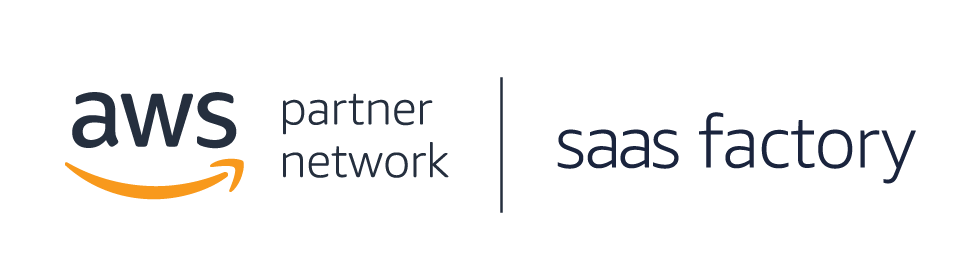

   SaaS (Software as a Service) is a rapidly growing business model where software is delivered over the internet. AWS (Amazon Web Services) is a dominant player in the cloud computing space, providing the infrastructure for many SaaS businesses. As the SaaS market becomes more competitive, companies often resort to offering discounts to attract and retain customers. While discounts can drive short-term sales, they can also lead to reduced profit margins, especially if not strategically managed.

   
To better understand customer behavior and optimize marketing strategies, businesses often use RFM (Recency, Frequency, Monetary) analysis. RFM helps in segmenting customers based on their purchase history, enabling more targeted and effective marketing efforts. This analysis can also shed light on how discount strategies affect different customer segments, particularly in the context of profit margins.

# Stakeholder

**Sales and Marketing Directors**: They oversee both the sales and marketing functions, ensuring alignment with company goals and strategic objectives. They make high-level decisions about resource allocation, sales planning, and marketing strategies.


# Problem Statement

   The use of discounts as a sales strategy has been increasing in the SaaS market, driven by the need to stay competitive. However, this approach can lead to a decline in profit margins, especially when discounts are applied without a clear understanding of their impact on different country and customer segments. **There is a need to analyze the effects of discounts on profit margins** and to determine how these strategies influence **customer behavior across different country and segments identified through RFM analysis**. Specifically, the challenge is to **balance discount offers with maintaining healthy profit margins while optimizing customer retention and lifetime value**.

## Business Question

1. **How do discounts affect the profits** generated from different countries?
2. **How can customer segmentation through RFM Analysis** be used to assess the sales and profit performance for each customer segment?
3. What recommendations can be made to **maximize profit** and **retention for each customer segment**?


# Goal

The primary goal of this analysis is to assess **the impact of discount strategies on the profitability of SaaS sales through AWS**. This will involve:
1. **Quantifying the impact of discounts on profit margins**, especially identifying instances where discounts lead to negative profits
2. **Using RFM analysis to segment customers based on their behavior** and gain insights into how different customer groups engage with the business.
3. **Developing actionable insights** that can inform future discount strategies, ensuring they drive sales without compromising profitability.
4. **Recommending strategies to optimize customer retention and lifetime value** through targeted discount offers, ensuring a balance between competitive pricing and sustainable profit margins.

# Data

To answer the questions above, we will analyze the transaction data that the company has collected. The dataset can be accessed [here](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales). 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import kstest, kruskal
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

## Importing Data

This dataset contains information related to transaction details, customer demographics, and sales performance, captured for each order placed. There are 19 columns in the SaaS-Sales dataset, including:

|No|Column Name    |Description                                              |
|--|---------------|---------------------------------------------------------|
|1 | `Row ID`      | A unique identifier for each transaction.               |
|2 | `Order ID`    | A unique identifier for each order.                     |
|3 | `Order Date`  | The date when the order was placed.                     |
|4 | `Date Key`    | A numerical representation of the order date (YYYYMMDD).|
|5 | `Contact Name`| The name of the person who placed the order.            |
|6 | `Country`     | The country where the order was placed.                 |
|7 | `City`        | The city where the order was placed.                    |
|8 | `Region`      | The region where the order was placed.                  |
|9 | `Subregion`   | The subregion where the order was placed.               |
|10| `Customer`    | The name of the company that placed the order.          |
|11| `Customer ID` | A unique identifier for each customer.                  |
|12| `Industry`    | The industry the customer belongs to.                   |
|13| `Segment`     | The customer segment (SMB, Strategic, Enterprise, etc.).|
|14| `Product`     | The product was ordered.                                |
|15| `License`     | The license key for the product.                        |
|16| `Sales`       | The total sales amount for the transaction.             |
|17| `Quantity`    | The total number of items in the transaction.           |
|18| `Discount`    | The discount applied to the transaction.                |
|19| `Profit`      | The profit from the transaction.                        |

Here are the top 5 and bottom 5 rows from the SaaS-Sales dataset.

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Data Understanding and cleaning

Data understanding involves exploring and analyzing data to grasp its structure and quality, while data cleaning focuses on correcting inaccuracies and inconsistencies to ensure the data is accurate and usable.

In [3]:
print(f'''The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.
''')
df.info()

The dataset contains 9994 rows and 19 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-

In [4]:
df.describe(include = 'number').drop(['Row ID','Date Key','Customer ID'], axis = 1).T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


In [5]:
df.describe(include = 'object').drop('License', axis = 1).T

,count,unique,top,freq
Order ID,9994,5009,EMEA-2023-100111,14
Order Date,9994,1237,9/6/2022,38
Contact Name,9994,793,Leonard Kelly,37
Country,9994,48,United States,2001
City,9994,262,London,922
Region,9994,3,EMEA,4219
Subregion,9994,12,NAMER,2507
Customer,9994,99,Allianz,192
Industry,9994,10,Finance,2127
Segment,9994,3,SMB,5191


In [6]:
pd.set_option('display.max_colwidth', None)

# unique data in each columns
listItem = list()
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tableDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tableDesc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

In general, we can observe that:

* The dataset contains 9,994 rows and 19 columns.
* The `Row ID` column contains unique identifiers for each row, which are not relevant for analysis and can be removed.
* The `Date Key` column contains transaction dates that have been converted to numeric data types, so it's unnecessary for analysis since transaction dates are already represented by the `Order Date` column, and this column can be removed.
* The `Order Date` column has an object data type. Based on its description, this column should contain datetime data type.
* The `Customer ID` column is numeric. Based on its description, this column should contain unique IDs for each customer, so it’s not needed for mathematical operations and will be converted to an object data type.

### To check if there is any missing values

In [7]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / df.shape[0]) * 100
missing_values = missing_values.reset_index().rename(columns = {'index':'Column Name'})
missing_values

,Column Name,Total Null Values,Percentage
0,Row ID,0,0.0
1,Order ID,0,0.0
2,Order Date,0,0.0
3,Date Key,0,0.0
4,Contact Name,0,0.0
5,Country,0,0.0
6,City,0,0.0
7,Region,0,0.0
8,Subregion,0,0.0
9,Customer,0,0.0


From this table, we can see in SaaS Sales Dataset there is **no missing value**, in all 19 Columns has its own data.

In [8]:
# Delete unnecessary columns, Index can already represent Row ID, and Order Date can represent Date Key.
df = df.drop(columns = ['Row ID','Date Key']) 

In [9]:
# Changing Customer ID format from integer to object
df['Customer ID'] = df['Customer ID'].astype(str)

# Changing Order Date format from object to datetime64[ns]
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

From this table, we can see that **all the columns already have correct data types**.

### To check if there is any duplicated data

In [11]:
df.duplicated().value_counts()

False    9994
Name: count, dtype: int64

After checking the SaaS Sales Dataset for duplicates, **no duplicate data was found.**

### To check if there is any outliers

Using a boxplot to identify outliers in this dataset:

An outlier is a data point that significantly deviates from the rest of the observations. Outliers can impact the accuracy of decision-making after analysis. Several factors can lead to the presence of outliers, such as data entry errors, actual anomalies in the data, misunderstanding of the units in a question, and more.

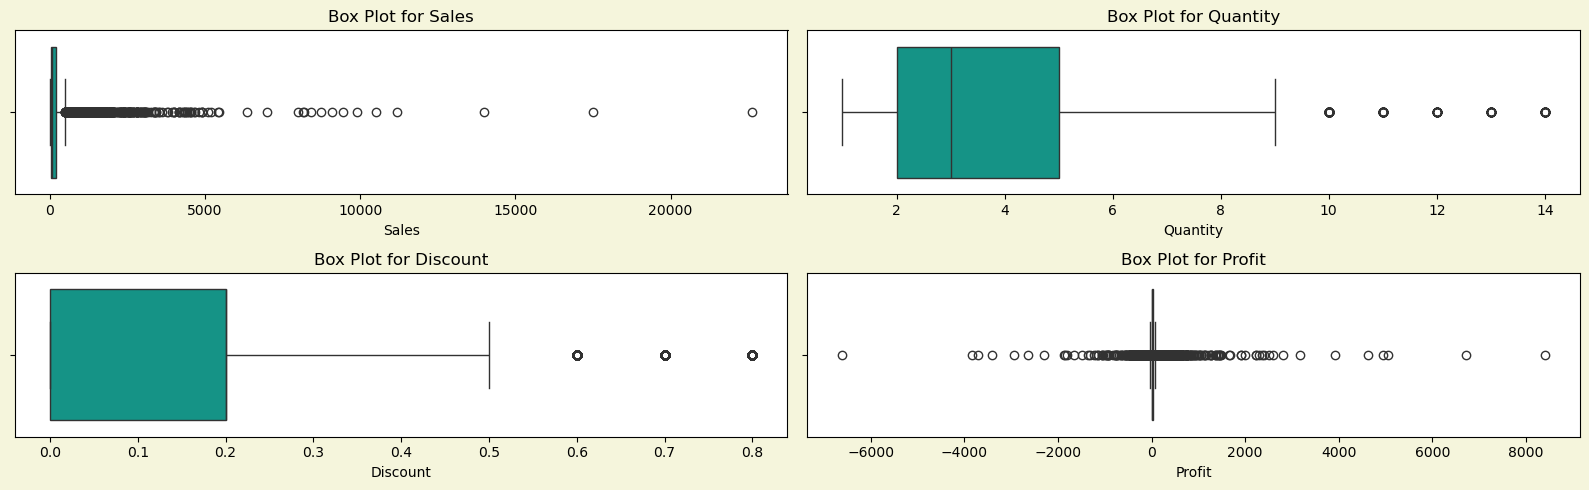

In [12]:
k=1
plt.figure(figsize = (16,5),facecolor = 'beige')
for i in df.select_dtypes(include = 'number'):
    plt.subplot(2,2,k)
    sns.boxplot(df[i],orient = 'h',color = '#00A896')
    plt.title(f'Box Plot for {i}')
    k+=1
    
plt.tight_layout()
plt.show()

In [13]:
list_outlier = list()

num_desc = df.describe(include = 'number').T
for i in num_desc.index:
    Q1 = num_desc.loc[i]['25%']
    Q3 = num_desc.loc[i]['75%']
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR
    outlier = df[(df[i] < lowerbound) | (df[i] > upperbound)]
    list_outlier.append({'Column Name':i,'Lower Bound':round(lowerbound,2),'Upper Bound':round(upperbound,2),'Number of Outliers':len(outlier),'Percentage':f'{round((len(outlier) / len(df) )* 100,2)}%'})
outliers = pd.DataFrame(list_outlier)
outliers

,Column Name,Lower Bound,Upper Bound,Number of Outliers,Percentage
0,Sales,-271.71,498.93,1167,11.68%
1,Quantity,-2.50,9.50,170,1.7%
2,Discount,-0.30,0.50,856,8.57%
3,Profit,-39.72,70.82,1881,18.82%


Conclusion

- Sales: There are many outliers in the Sales column, indicating a significant deviation from the typical sales range. This suggests frequent occurrences of extremely high sales figures that fall far outside the expected values in this dataset.

- Quantity: The Quantity column has fewer outliers, but there are still instances where the number of items ordered is unusually high or low compared to the normal range of order quantities.

- Discount: Similar to Sales, the Discount column has a large number of outliers, indicating significant deviations from the usual discount figures. There are frequent instances of very high discount beyond the defined bounds.

- Profit: Similar to Sales and Discount, the Profit column has a large number of outliers, indicating significant deviations from the usual profit figures. There are frequent instances of both very low and very high profits beyond the defined bounds.

I will retain the outliers in this dataset, as they are crucial for analyzing negative profits and understanding how discount might be associated with negative profits. Removing outliers would prevent a thorough investigation of these conditions and hinder answering the key questions of the analysis. So **no treatment will be applied to these outliers.**

## Cleaned Data

We have finished cleaning our data; now, let’s take a quick look at the information from the cleaned dataset.

In [14]:
listItem = list()
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(f'''The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.
''')
dfDesc

The dataset contains 9994 rows and 17 columns.



,dataFeatures,dataType,null,unique,uniqueSample
0,Order ID,object,0,5009,"[EMEA-2022-152814, EMEA-2023-132738]"
1,Order Date,datetime64[ns],0,1237,"[2020-05-27T00:00:00.000000000, 2023-04-22T00:00:00.000000000]"
2,Contact Name,object,0,793,"[Julia Ellison, Karen Mathis]"
3,Country,object,0,48,"[Iceland, Saudi Arabia]"
4,City,object,0,262,"[Bari, Singapore]"
5,Region,object,0,3,"[EMEA, APJ]"
6,Subregion,object,0,12,"[EU-WEST, EU-EAST]"
7,Customer,object,0,99,"[Gazprom, Toyota Motor]"
8,Customer ID,object,0,99,"[1079, 1019]"
9,Industry,object,0,10,"[Finance, Energy]"


# Data Analysis

Once the data cleaning is complete, we will analyze the factors contributing to negative profitability in AWS SaaS product sales and propose strategies to boost profitability. This includes examining the impact of discount sizes on overall profit margins, evaluating how discount effectiveness varies across different countries, categorizing customers using RFM (Recency, Frequency, Monetary) analysis, and assessing profit and sales outcomes for each customer segment identified through this analysis.

## Sales Trend

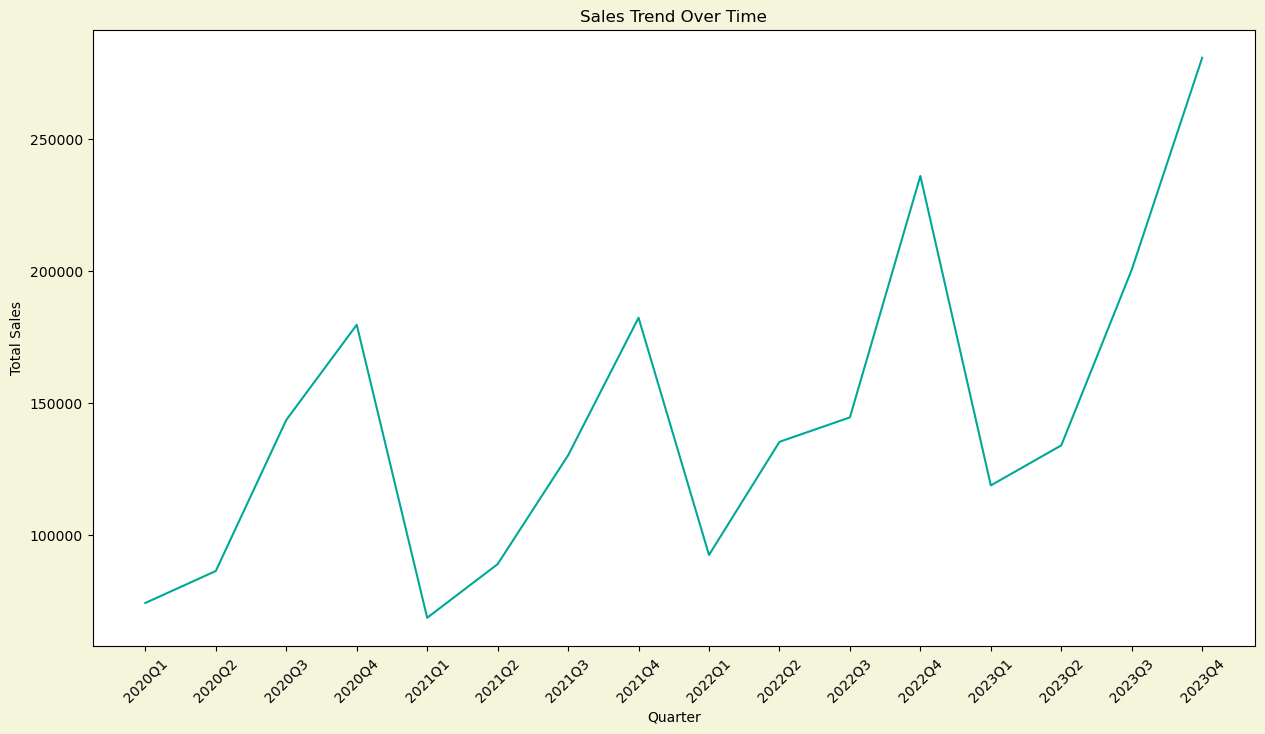

In [15]:
# Sales trends over time (quarterly)
sales_quarterly_trends = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum().reset_index().rename(columns={'Order Date':'YearQuarter'})

plt.figure(figsize=(15, 8),facecolor = 'beige')
plt.plot(sales_quarterly_trends['YearQuarter'].astype(str), sales_quarterly_trends['Sales'],color = '#00A896')
plt.xticks(rotation=45)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Sales Trend Over Time')
plt.show()

Based on the quarterly sales data, here are some key insights:

- **Overall Growth Trend**: There is a noticeable **upward trend in sales over time**. Sales have generally increased each quarter from 2020 to 2023, indicating strong growth.

- **Seasonal Variations**: Sales show significant fluctuations across quarters. For instance, **sales peak in Q4 each year**, suggesting a **seasonal trend where the end of the year generates higher revenue** compared to other quarters.

- **Quarterly Comparison**: **The highest sales were recorded in Q4 of 2023**, reaching 280,594.8270 USD, while **the lowest was in Q1 of 2021** at 68,851.7386 USD. This reflects substantial growth in the most recent quarters.

- **Annual Growth**: Comparing the same quarters across different years, **there is a consistent increase in sales**, such as from Q1 2020 (74,447.7960 USD) to Q1 2023 (118,895.6174 USD), indicating **overall annual growth**.

- **Quarterly Performance**: **The most significant sales increase occurs from Q3 2022 to Q4 2022**, suggesting that the end of the year brings a strong boost in sales, which could be due to end-of-year promotions or increased demand.

- **Every transition from Q4 of one year to Q1 of the next year shows a decline in sales**. For example, sales decreased from 179,627.7302 USD in Q4 2020 to 68,851.7386 USD in Q1 2021, and similarly from 182,297.0082 USD in Q4 2021 to 92,596.4190 USD in Q1 2022. This pattern suggests a recurring seasonal drop in sales at the start of each year following the strong performance in Q4.

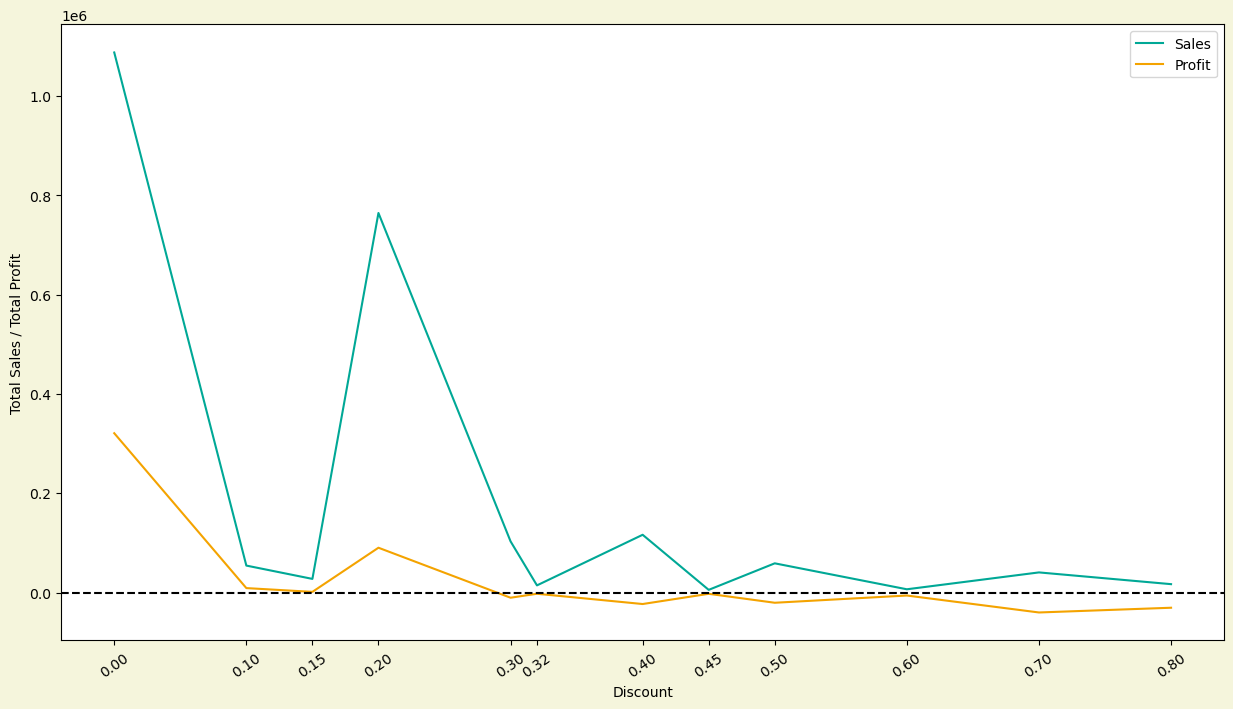

In [16]:
discount_impact = df.groupby('Discount')[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(15,8),facecolor = 'beige')
sns.lineplot(data = discount_impact, x = 'Discount', y = 'Sales',label = 'Sales',color = '#00A896')
sns.lineplot(data = discount_impact, x = 'Discount', y = 'Profit',label = 'Profit',color = '#F4A300')
plt.axhline(y=0, linestyle = '--',color = 'black')
plt.xticks(discount_impact['Discount'],rotation = 35)
plt.ylabel('Total Sales / Total Profit')
plt.legend()
plt.show()

insight:

1. Sales vs. Profit Trends:

- There is a noticeable decline in both sales and profit as the discount increases, especially after the initial peak.
- The chart shows that at lower discount levels (near 0.0), there is a significant sales volume, but profit decreases sharply and eventually turns negative as discounts increase.

2. Critical Points of Negative Profit:

- Around the 0.10 to 0.20 discount range, profit drops to zero and even turns negative. This suggests that discounting in this range erodes the profit margin significantly, potentially leading to losses.
- The sales trend exhibits some spikes at specific discount levels (around 0.20 and 0.32), indicating possible customer responsiveness to these discount levels, but this does not translate to higher profitability.

3. Minimal Gains with Higher Discounts:

- As the discount increases beyond 0.32, both sales and profits remain low, with profits hovering around the zero mark. This indicates that higher discounts are not effective in driving significant sales or profitability.
- The consistency of low profit at higher discounts suggests that these discounts might be too deep to maintain profitability, or the sales volume they generate is insufficient to cover costs.

4. Optimal Discount Range:

- The data suggests that the optimal discount range, if any, might lie just below the 0.10 mark, where sales are still relatively high, and profit has not yet turned negative. Beyond this point, the trade-off between sales and profit becomes increasingly unfavorable.

## Discount Analysis

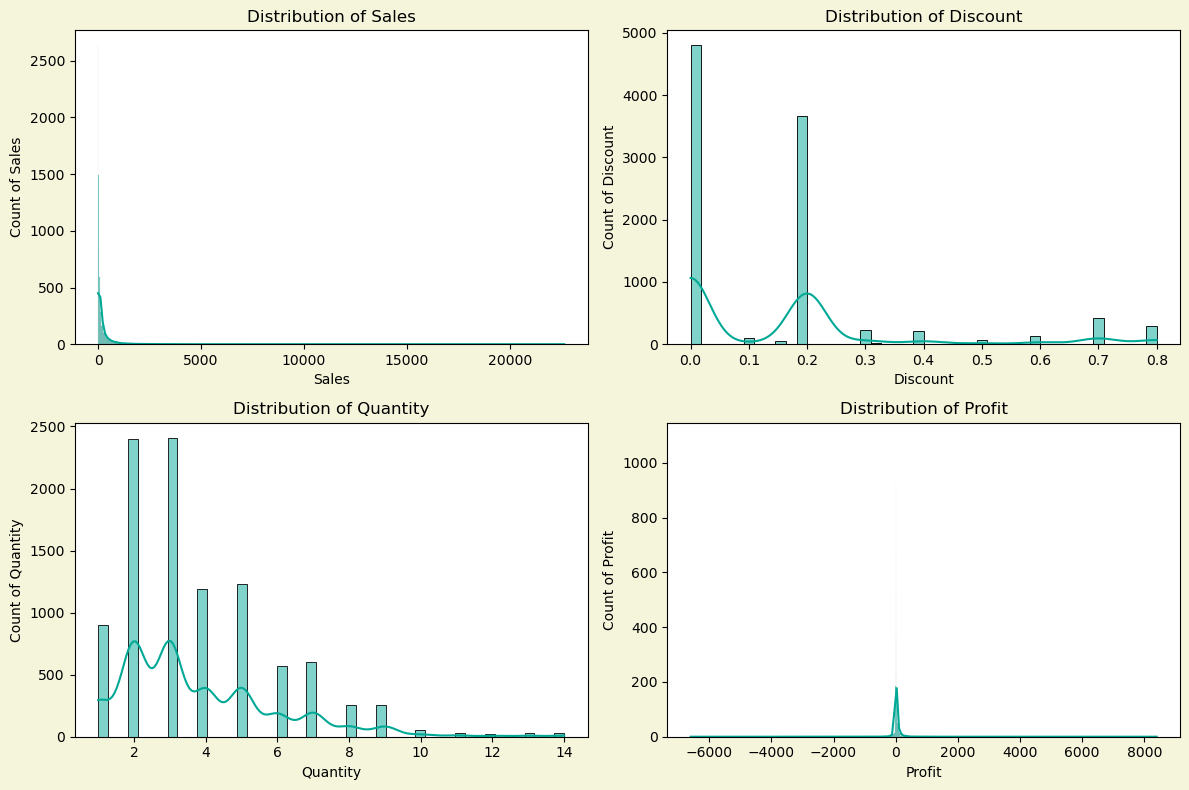

In [17]:
# normallity checking for Sales, Discount, Quantity, and Profit columns

plt.figure(figsize=(12,8),facecolor = 'beige')
k=1
for i in ['Sales','Discount','Quantity','Profit']:
    plt.subplot(2,2,k)
    sns.histplot(x=df[i],kde = True,color = '#00A896')
    plt.ylabel(f'Count of {i}')
    plt.title(f'Distribution of {i}')
    k+=1

plt.tight_layout()
plt.show()

`insight`:

The Histogram shows that Sales, Discount, Quantity, and Profit columns are **not normally distributed**. therefore we need to use spearman method for calculating the correlation between these columns.

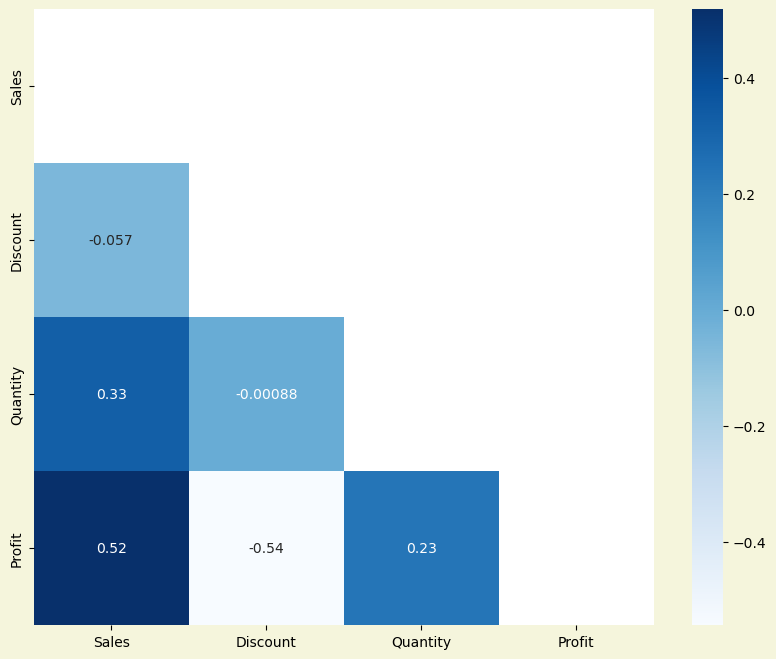

In [18]:
# calculating the correlation between Sales, Discount, Quantity, and Profit columns

correlation = df[['Sales','Discount','Quantity','Profit']].corr('spearman')
matriks = np.triu(correlation)
plt.figure(figsize = (10,8),facecolor='beige')
sns.heatmap(correlation,annot = True,mask = matriks,cmap = 'Blues')
plt.show()

`insight`:

The heatmap reveals a **negative correlation** between discounts and profit, indicating that **negative profitability is influenced by offering discounts**.

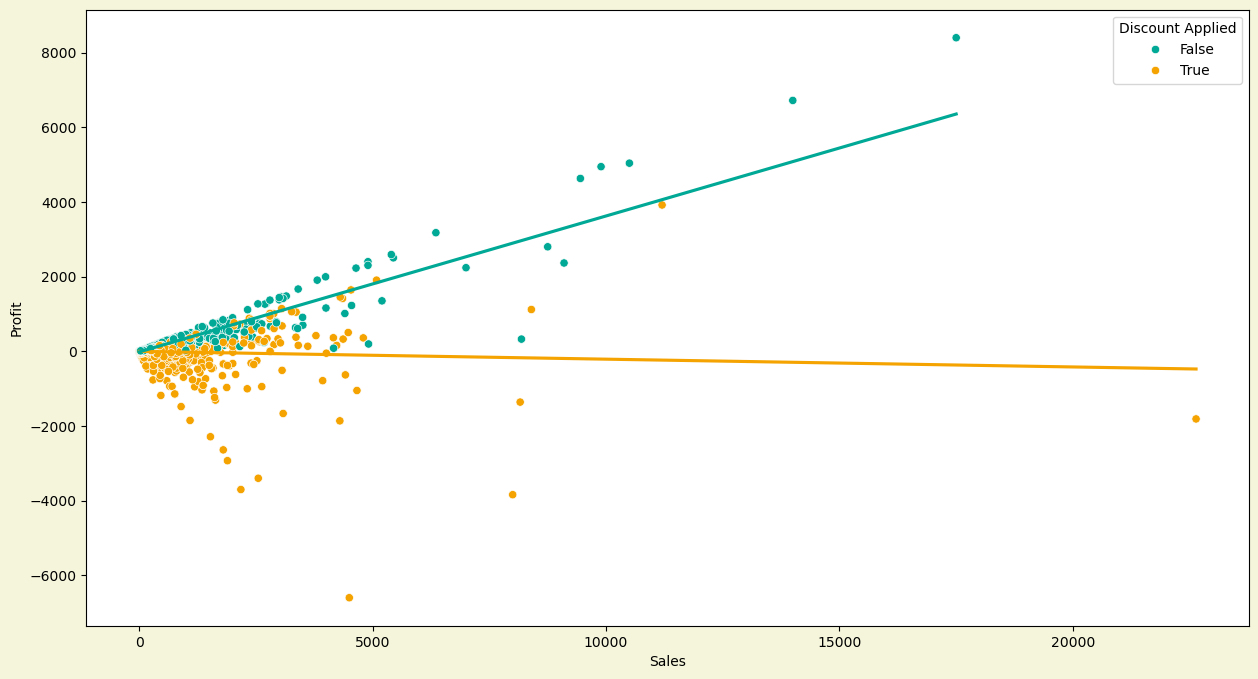

In [19]:
df['Discount Applied'] = df['Discount'] > 0
color_palette = {
    True: '#F4A300',  
    False: '#00A896'  
}
plt.figure(figsize= (15,8),facecolor = 'beige')
sns.scatterplot(data = df, y = 'Profit',x='Sales', hue='Discount Applied',palette = color_palette)
sns.regplot(data = df[df['Discount Applied']==True], y = 'Profit',x='Sales',scatter = False, color = '#F4A300',ci = False)
sns.regplot(data = df[df['Discount Applied']==False], y = 'Profit',x='Sales',scatter = False, color = '#00A896',ci = False)

plt.show()

`insight`:

The scatter plot shows that the **relationship between profit and sales is affected by discounts**, with sales resulting in negative profit often being associated with discounts.

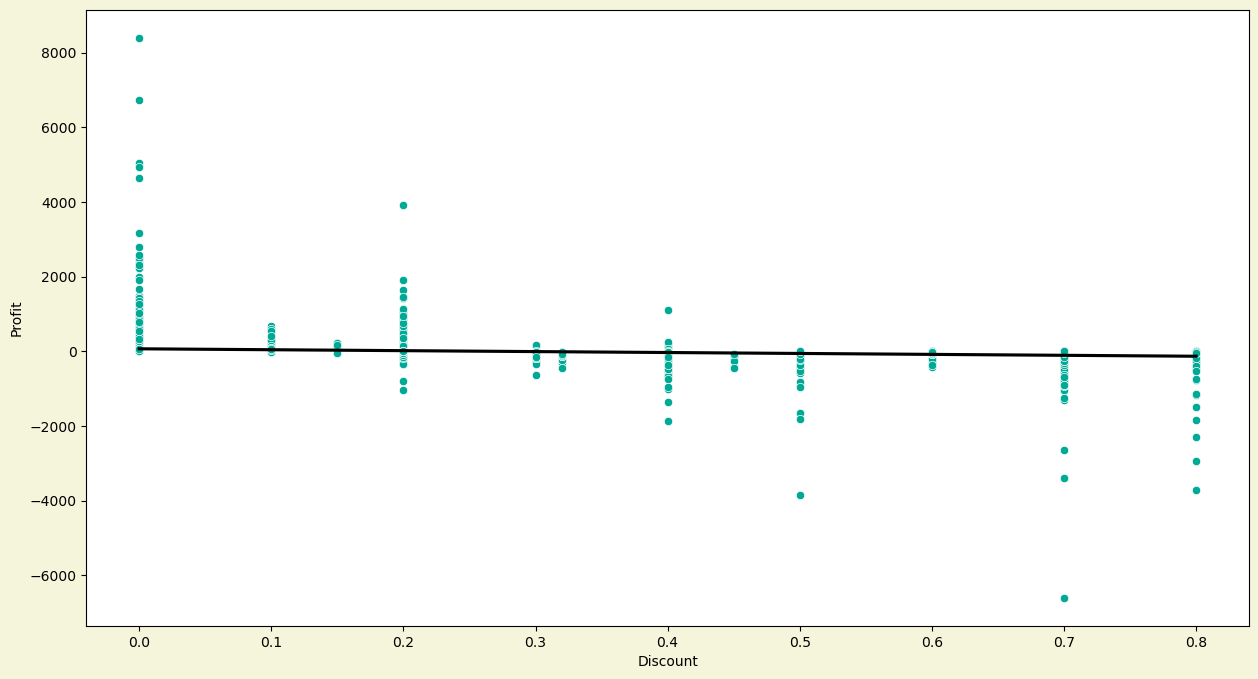

In [20]:
plt.figure(figsize= (15,8),facecolor = 'beige')
sns.scatterplot(data = df, y = 'Profit',x='Discount',color='#00A896')
sns.regplot(data = df, y = 'Profit',x='Discount',scatter = False,color = 'black')
plt.show()

`insight`:

From the scatter plot showing the relationship between discount and profit, it is clear that **larger discounts are associated with lower profit**.

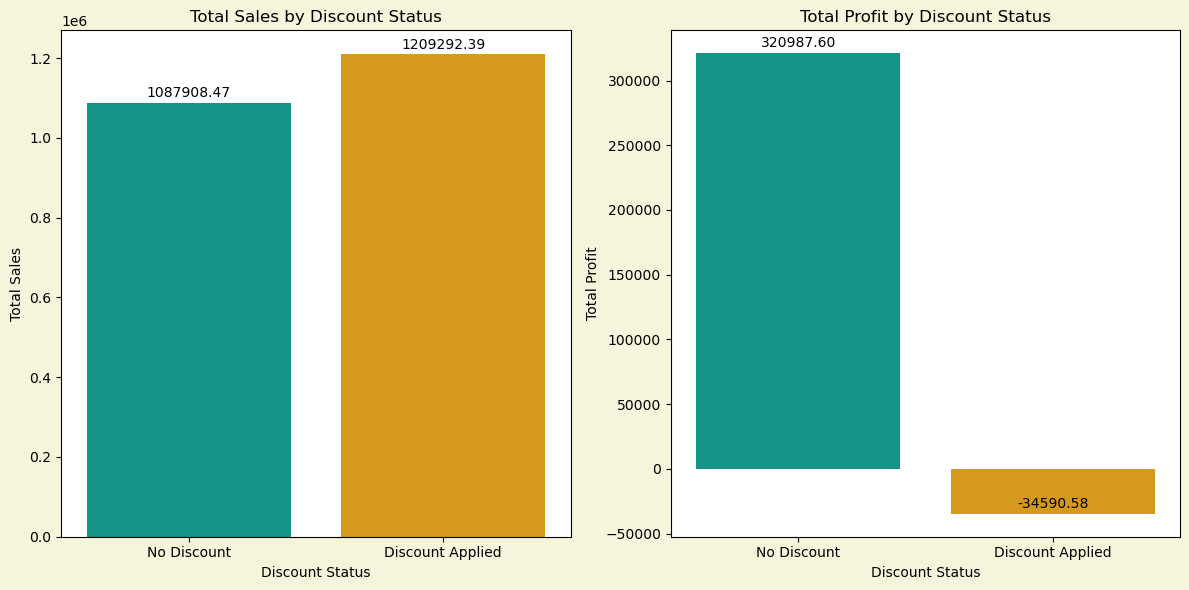

In [21]:
# Categorize Discounted and Non-discounted Transactions
df['Discount Applied'] = df['Discount'] > 0

# Compare Sales and Profit
discount_analysis = df.groupby('Discount Applied').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Visualization
color_palette = {
    'True': '#F4A300',  
    'False': '#00A896'  
}
plt
plt.figure(figsize=(12, 6),facecolor = 'beige')

plt.subplot(1, 2, 1)
ax = sns.barplot(x=discount_analysis['Discount Applied'],y = discount_analysis['Sales'], palette = color_palette)
plt.xticks(discount_analysis.sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
plt.xlabel('Discount Status')
plt.ylabel('Total Sales')
plt.title('Total Sales by Discount Status')
# Annotate barplot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()-10000), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')


plt.subplot(1, 2, 2)
ax = sns.barplot(x=discount_analysis['Discount Applied'],y = discount_analysis['Profit'], palette = color_palette)
plt.xticks(discount_analysis.sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
plt.xlabel('Discount Status')
plt.ylabel('Total Profit')
plt.title('Total Profit by Discount Status')
# Annotate barplot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()-3000), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')


plt.tight_layout()
plt.show()

`insight`:

- **Effect of Discounts on Profit**: When a discount is applied, sales increase from approximately 1,087,908 USD to 1,209,292 USD. However, despite the higher sales with a discount, the profit decreases significantly from 320,987.60 USD to -34,590.58 USD, indicating that discounts lead to negative profitability.

- **Impact on Profitability**: The barchart suggests that while discounts can boost sales, they can also decrease profit margins, resulting in a loss when discounts are applied.

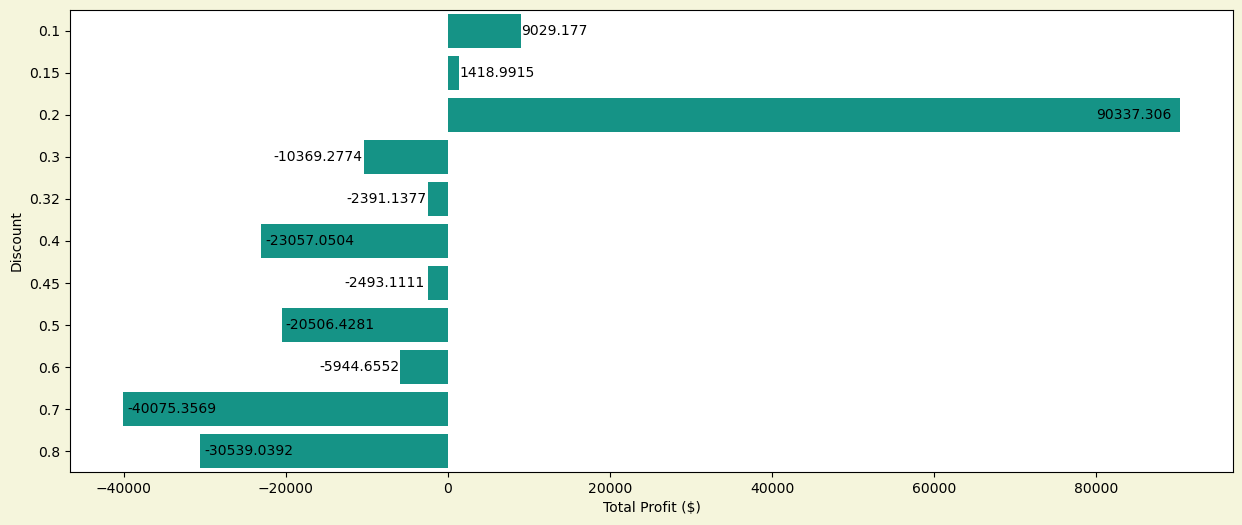

In [22]:
profit_by_discount = df.groupby('Discount')['Profit'].sum().reset_index()
profit_by_discount = profit_by_discount[profit_by_discount['Discount']!=0]

plt.figure(figsize=(15, 6),facecolor = 'beige')
ax = sns.barplot(y=profit_by_discount['Discount'], x=profit_by_discount['Profit'],orient='h',color='#00A896')
plt.xlabel('Total Profit ($)')
# Annotate barplot
plt.text(x=9000,y=0.1,s=9029.1770)
plt.text(x=1400,y=1.1,s=1418.9915)
plt.text(x=80000,y=2.1,s=90337.3060)
plt.text(x=-21500,y=3.1,s=-10369.2774)
plt.text(x=-12500,y=4.1,s=-2391.1377)
plt.text(x=-22500,y=5.1,s=-23057.0504)
plt.text(x=-12800,y=6.1,s=-2493.1111)
plt.text(x=-20000,y=7.1,s=-20506.4281)
plt.text(x=-15800,y=8.1,s=-5944.6552)
plt.text(x=-39500,y=9.1,s=-40075.3569)
plt.text(x=-30000,y=10.1,s=-30539.0392)
plt.show()

`insight`:

- **Profit Trends with Discount Changes**: As the discount percentage increases, profit shows a mixed trend. Initially, lower discounts (0.10 and 0.15) lead to positive profit, but as discounts rise further, profit becomes increasingly negative.

- **Profit Decline**: At discounts above 0.20, profit starts to decline sharply. For instance, at a 0.30 discount, profit becomes negative at -10,369.28 USD, and continues to decrease with higher discounts, reaching -40,075.36 USD at a 0.70 discount.

- **Optimal Discount Range**: The barchart suggests that very high discounts are detrimental to profitability, indicating that there may be an optimal discount range where profit remains positive or less negative.

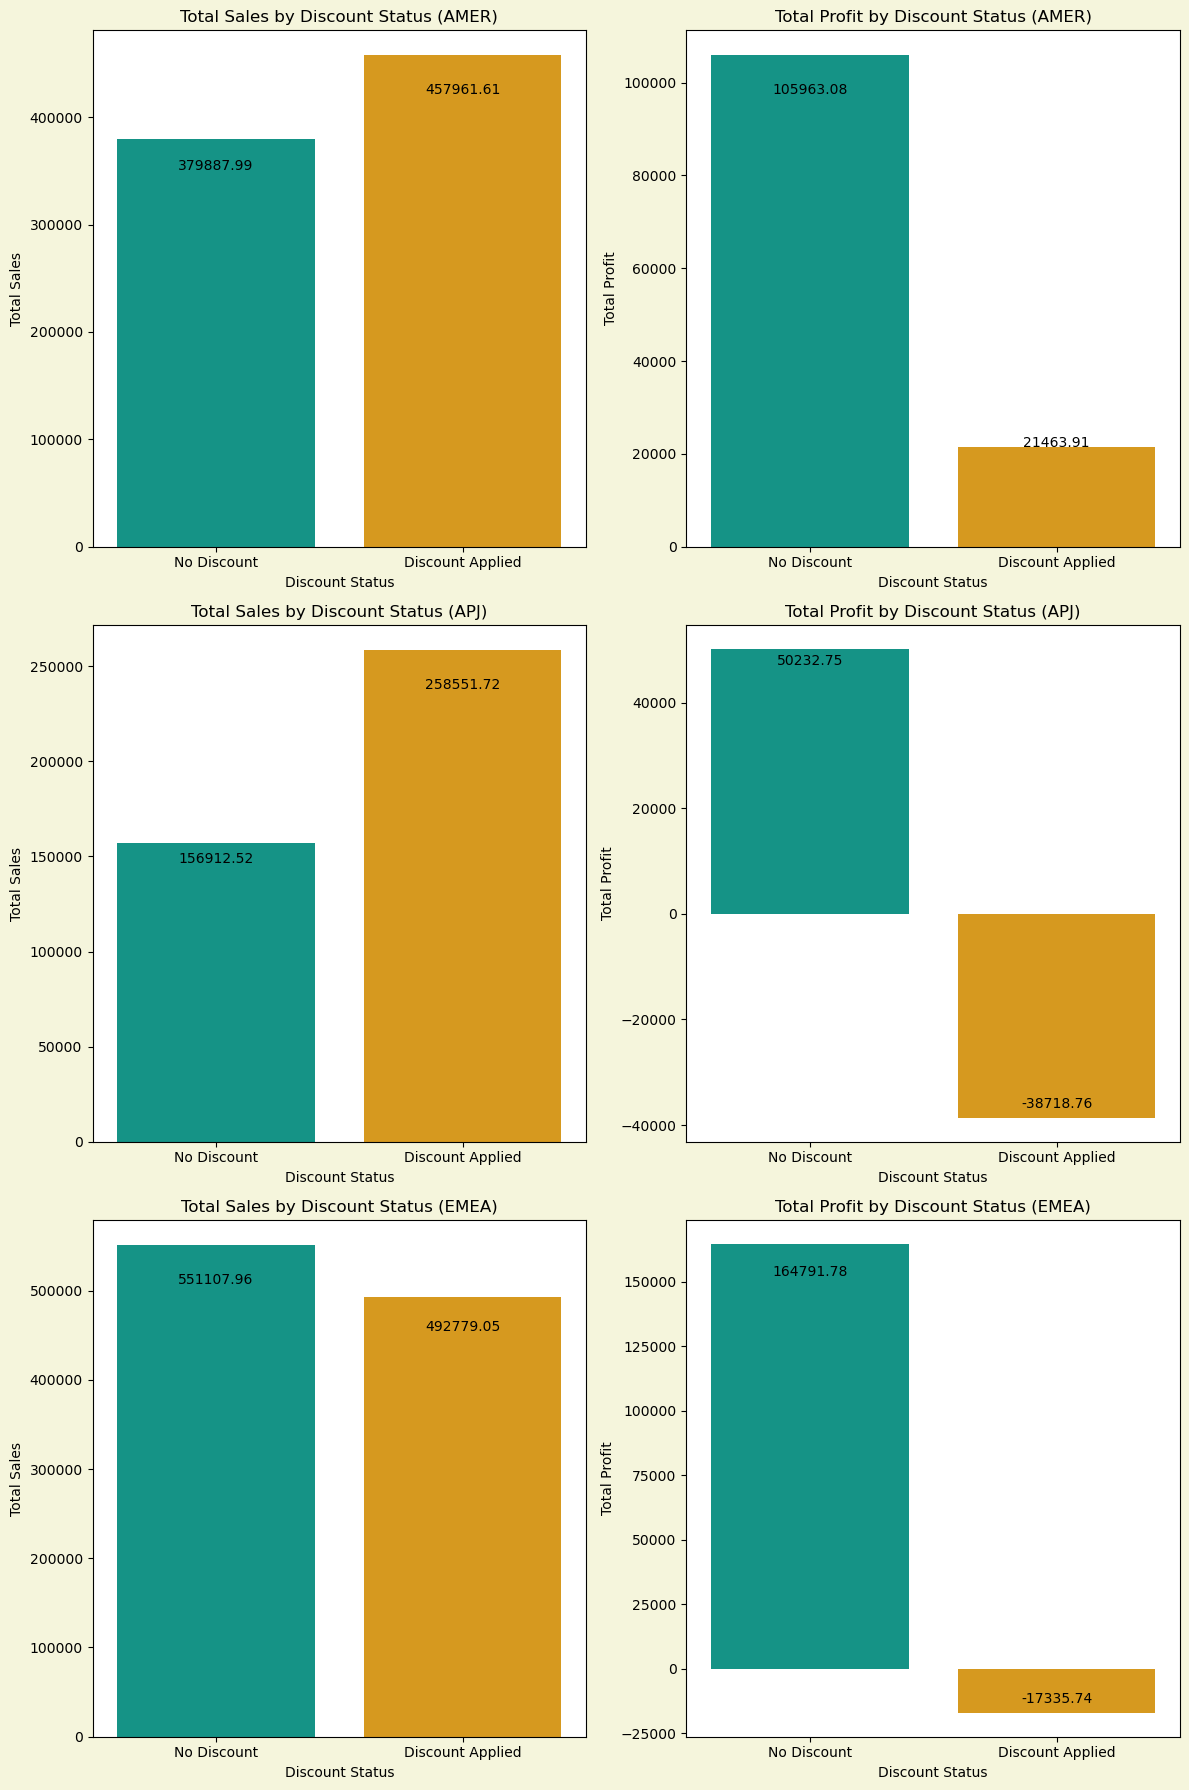

In [23]:

# AMER APJ EMEA
df['Discount Applied'] = df['Discount'] > 0

# Compare Sales and Profit
discount_analysis_amer = df[df['Region']=='AMER'].groupby(['Region','Discount Applied']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

discount_analysis_apj = df[df['Region']=='APJ'].groupby(['Region','Discount Applied']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

discount_analysis_emea = df[df['Region']=='EMEA'].groupby(['Region','Discount Applied']).agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# Visualization
color_palette = {
    'True': '#F4A300',  
    'False': '#00A896'  
}
plt.figure(figsize=(12, 18),facecolor = 'beige')

plt.subplot(3, 2, 1)
ax = sns.barplot(x=discount_analysis_amer['Discount Applied'],y = discount_analysis_amer['Sales'], palette = color_palette)
plt.xlabel('Discount Status')
plt.xticks(discount_analysis_amer.sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
plt.ylabel('Total Sales')
plt.title('Total Sales by Discount Status (AMER)')
# Annotate barplot
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*0.9), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    elif p.get_height()<0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    else:
        continue

plt.subplot(3, 2, 2)
ax = sns.barplot(x=discount_analysis_amer['Discount Applied'],y = discount_analysis_amer['Profit'], palette = color_palette)
plt.xlabel('Discount Status')
plt.xticks(discount_analysis_amer.sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
plt.ylabel('Total Profit')
plt.title('Total Profit by Discount Status (AMER)')
# Annotate barplot
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*0.9), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    elif p.get_height()<0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    else:
        continue

plt.subplot(3, 2, 3)
ax = sns.barplot(x=discount_analysis_apj['Discount Applied'],y = discount_analysis_apj['Sales'], palette = color_palette)
plt.xlabel('Discount Status')
plt.xticks(discount_analysis_apj.sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
plt.ylabel('Total Sales')
plt.title('Total Sales by Discount Status (APJ)')
# Annotate barplot
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*0.9), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    elif p.get_height()<0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    else:
        continue

plt.subplot(3, 2, 4)
ax = sns.barplot(x=discount_analysis_apj['Discount Applied'],y = discount_analysis_apj['Profit'], palette = color_palette)
plt.xlabel('Discount Status')
plt.xticks(discount_analysis_apj.sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
plt.ylabel('Total Profit')
plt.title('Total Profit by Discount Status (APJ)')
# Annotate barplot
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*0.9), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    elif p.get_height()<0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    else:
        continue

plt.subplot(3, 2, 5)
ax = sns.barplot(x=discount_analysis_emea['Discount Applied'],y = discount_analysis_emea['Sales'], palette = color_palette)
plt.xlabel('Discount Status')
plt.xticks(discount_analysis_emea.sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
plt.ylabel('Total Sales')
plt.title('Total Sales by Discount Status (EMEA)')
# Annotate barplot
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*0.9), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    elif p.get_height()<0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    else:
        continue

plt.subplot(3, 2, 6)
ax = sns.barplot(x=discount_analysis_emea['Discount Applied'],y = discount_analysis_emea['Profit'], palette = color_palette)
plt.xlabel('Discount Status')
plt.xticks(discount_analysis_emea.sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
plt.ylabel('Total Profit')
plt.title('Total Profit by Discount Status (EMEA)')
# Annotate barplot
for p in ax.patches:
    if p.get_height()>0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()*0.9), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    elif p.get_height()<0:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), 
                       textcoords = 'offset points')
    else:
        continue

plt.tight_layout()
plt.show()




`insight`:

- **AMER Region**: Applying discounts increases sales from 379,887.99 USD to 457,961.61 USD, but profit decreases from 105,963.08 USD to 21,463.91 USD. **Although profit decreases, it remains positive**.

- **APJ Region**: Sales rise from 156,912.52 USD to 258,551.72 USD with discounts, but profit shifts from 50,232.75 USD to -38,718.76 USD. This indicates that **discounts result in negative profit in this region**.

- **EMEA Region**: Sales decrease from 551,107.96 USD to 492,779.06 USD with discounts, and profit declines from 164,791.78 USD to -17,335.74 USD. This also shows that **discounts lead to negative profit in this region**.

- In the APJ and EMEA regions, applying discounts results in negative profit. While discounts do lead to a decrease in profit in the AMER region, the profit remains positive.

In [24]:
discount_analysis_subregion = df.groupby(['Subregion','Discount Applied']).agg({'Sales': 'sum',
                                                                                'Profit': 'sum'}).reset_index()
for i in discount_analysis_subregion['Subregion'].unique():
    count = discount_analysis_subregion[discount_analysis_subregion['Subregion']==i]['Profit'].count()
    if count ==1:        
        discount_applied = discount_analysis_subregion.loc[discount_analysis_subregion['Subregion'] == i, 'Discount Applied'].any()
        
        new_row = pd.DataFrame([{'Subregion': i,
                    'Discount Applied': not discount_applied,
                    'Sales': 0,
                    'Profit': 0}])
        discount_analysis_subregion = pd.concat((discount_analysis_subregion,new_row), axis = 0)

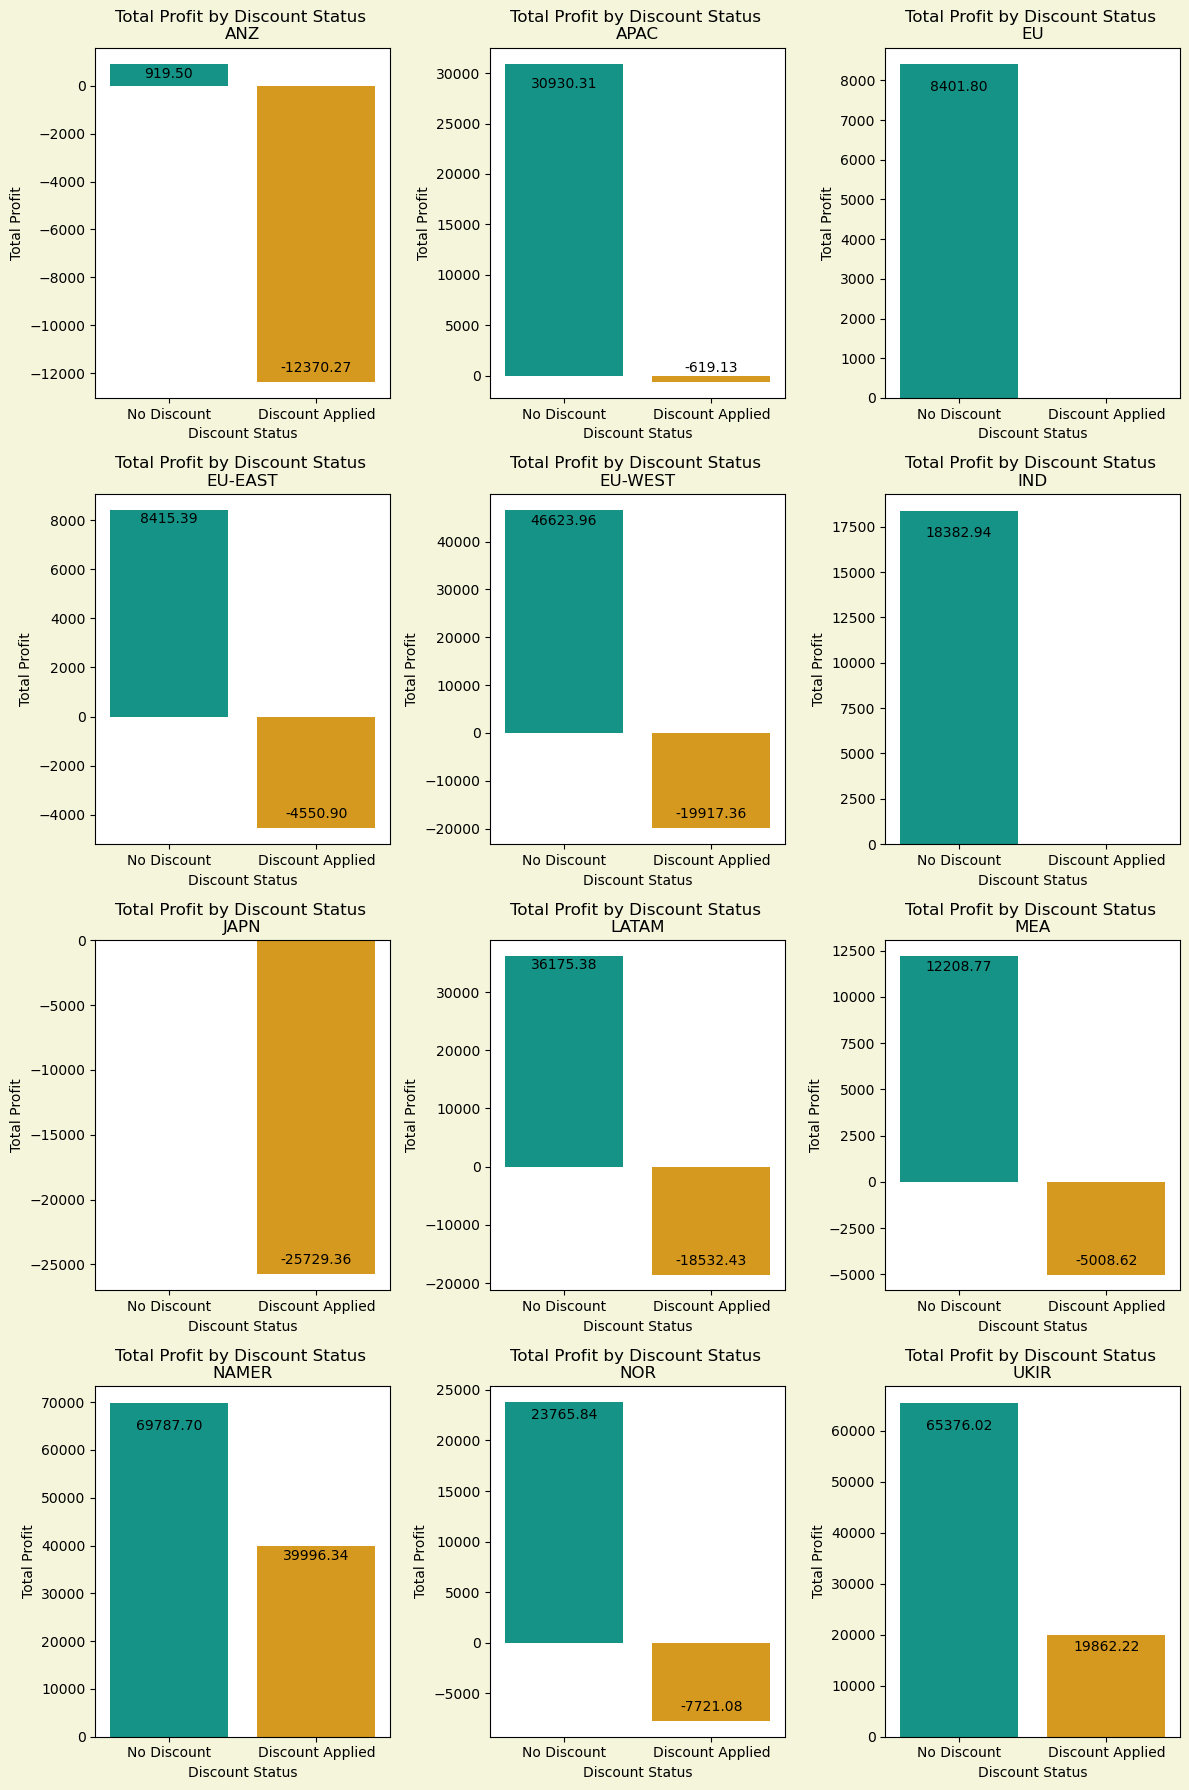

In [25]:
k=0
color_palette = {
    'True': '#F4A300',  
    'False': '#00A896'  
}
plt.figure(figsize=(12, 1.5 * (discount_analysis_subregion['Subregion'].nunique())),facecolor='beige')
for i in discount_analysis_subregion['Subregion'].unique():
    k+=1
    plt.subplot(4,3,k)
    ax = sns.barplot(data = discount_analysis_subregion[discount_analysis_subregion['Subregion']==i],x = 'Discount Applied',y ='Profit',palette = color_palette)
    plt.xlabel('Discount Status')
    plt.xticks(discount_analysis_subregion[discount_analysis_subregion['Subregion']==i].sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
    plt.ylabel('Total Profit')
    plt.title(f'Total Profit by Discount Status \n{i}')
    # Annotate barplot
    for p in ax.patches:
        if p.get_height()>0:
            if p.get_height() <1000:
                ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()-1000), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
            elif p.get_height() == 39996.3414:
                ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()-5000), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
            elif p.get_height() == 19862.2215:
                ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()-5000), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
            else:
                ax.annotate(format(p.get_height(), '.2f'), 
                               (p.get_x() + p.get_width() / 2., p.get_height()*0.89), 
                               ha = 'center', va = 'center', 
                               xytext = (0, 10), 
                               textcoords = 'offset points')
        elif p.get_height()<0:
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        else:
            continue
            

plt.tight_layout()
plt.show()


insight:

- In most subregions, **discounts lead to a decrease in profit**, often turning profits into negative values.
- **EU and IND show no transactions when discounts are applied**, indicating that discounts may completely deter transactions in these subregions.
- **JAPN uniquely has no transactions with no discount applied**, indicating a complete lack of activity without discounts, and a significant negative impact on profit when discounts are applied. indicating that **discounts are ineffective at stimulating transactions or improving profitability in JAPN**.
- **NAMER is an exception where discounts still result in positive profit**, suggesting a less detrimental impact on profitability compared to other regions.
- Overall, **discounts generally have a negative impact on profitability across various subregions**.

In [26]:
discount_analysis_country1 = df[df['Region']=='AMER'].groupby(['Country','Discount Applied']).agg({'Sales': 'sum',
                                                                                                  'Profit': 'sum'}).reset_index()
discount_analysis_country2 = df[df['Region']=='APJ'].groupby(['Country','Discount Applied']).agg({'Sales': 'sum',
                                                                                                  'Profit': 'sum'}).reset_index()
discount_analysis_country3 = df[df['Region']=='EMEA'].groupby(['Country','Discount Applied']).agg({'Sales': 'sum',
                                                                                                   'Profit': 'sum'}).reset_index()

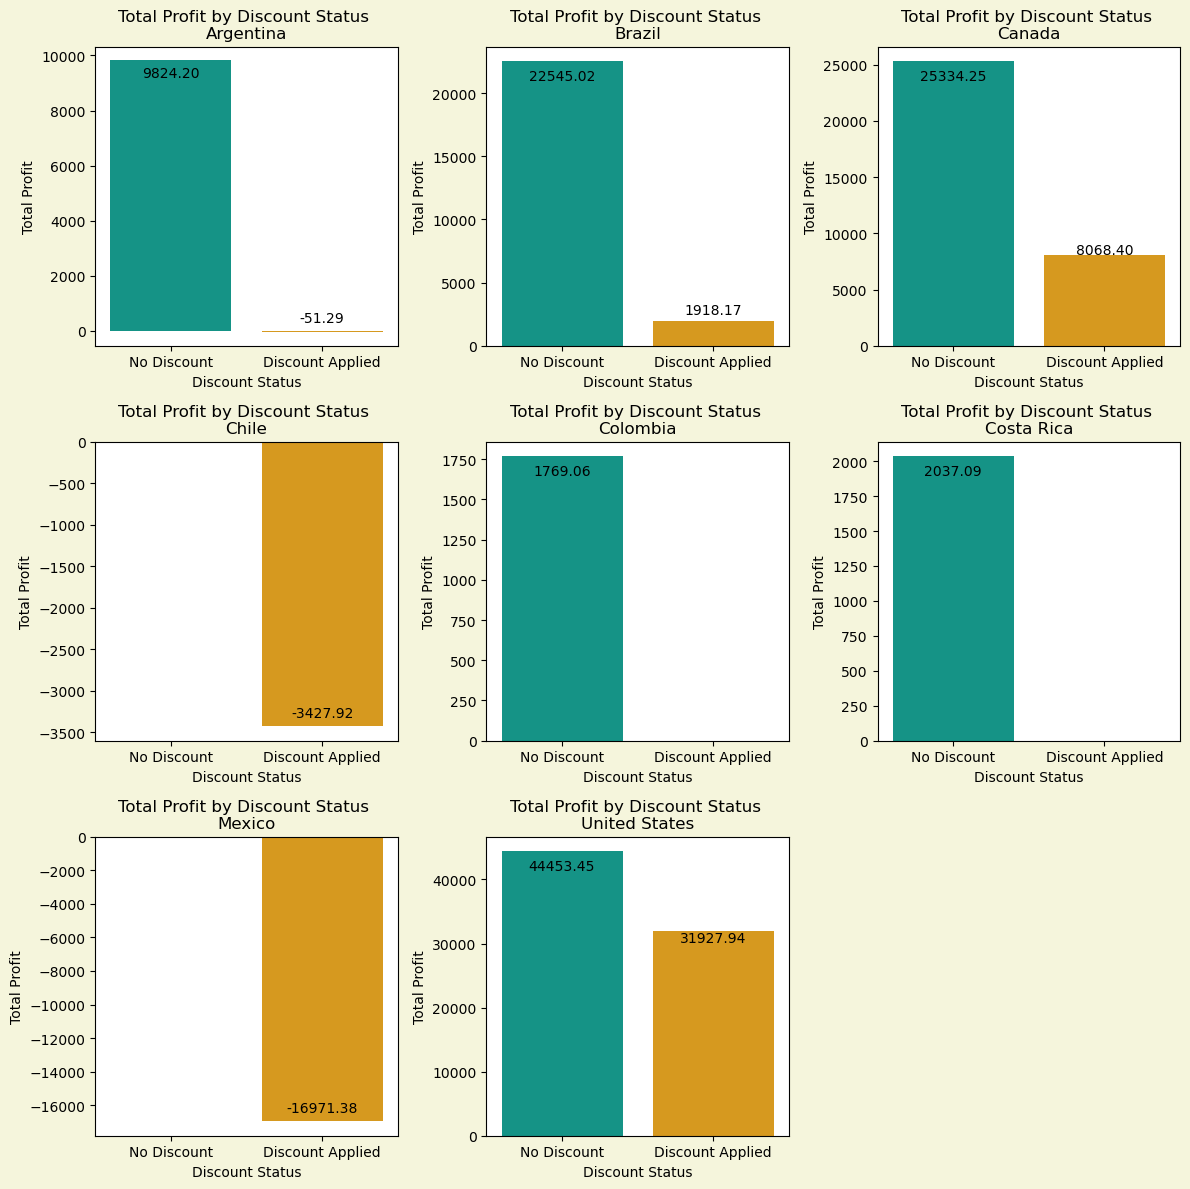

In [27]:
for i in discount_analysis_country1['Country'].unique():
    count = discount_analysis_country1[discount_analysis_country1['Country']==i]['Profit'].count()
    if count ==1:        
        discount_applied = discount_analysis_country1.loc[discount_analysis_country1['Country'] == i, 'Discount Applied'].any()
        
        new_row = pd.DataFrame([{'Country': i,
                    'Discount Applied': not discount_applied,
                    'Sales': 0,
                    'Profit': 0}])
        discount_analysis_country1 = pd.concat((discount_analysis_country1,new_row), axis = 0)
        
k=0
color_palette = {
    'True': '#F4A300',  
    'False': '#00A896'  
}
plt.figure(figsize=(12, 1.5 * (discount_analysis_country1['Country'].nunique())),facecolor = 'beige')
for i in discount_analysis_country1['Country'].unique():
    k+=1
    plt.subplot(3,3,k)
    ax = sns.barplot(data = discount_analysis_country1[discount_analysis_country1['Country']==i],x = 'Discount Applied',y ='Profit', palette = color_palette)
    plt.xlabel('Discount Status')
    plt.xticks(discount_analysis_country1[discount_analysis_country1['Country']==i].sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
    plt.ylabel('Total Profit')
    plt.title(f'Total Profit by Discount Status \n{i}')
    # Annotate barplot
    for p in ax.patches:
        if p.get_height()>0:
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()*0.9), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        elif p.get_height()<0:
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        else:
            continue
            

plt.tight_layout()
plt.show()


insight:

- Argentina and Chile show negative profits when discounts are applied, indicating that discounts are likely decreasing profit margins.
- Mexico stands out with a significant loss (16,971.38 USD) despite high sales (78,258.14 USD) when discounts are applied. This suggests that discounts are not effective in generating profitable sales in Mexico.
- Chile and Mexico have no transactions when no discounts are applied. This could indicate that customers in these countries are highly price-sensitive and are only willing to purchase when discounts are available.
- Similarly, Colombia and Costa Rica also have no transactions with discounts applied, indicating a potential issue with either the discounting strategy or market demand.
- Brazil, Canada and United States perform well both with and without discounts, suggesting a balanced market where discounts drive additional sales without significantly impacting profitability.
- Costa Rica and Colombia have relatively low sales volumes, but still maintain positive profits when no discounts are applied.

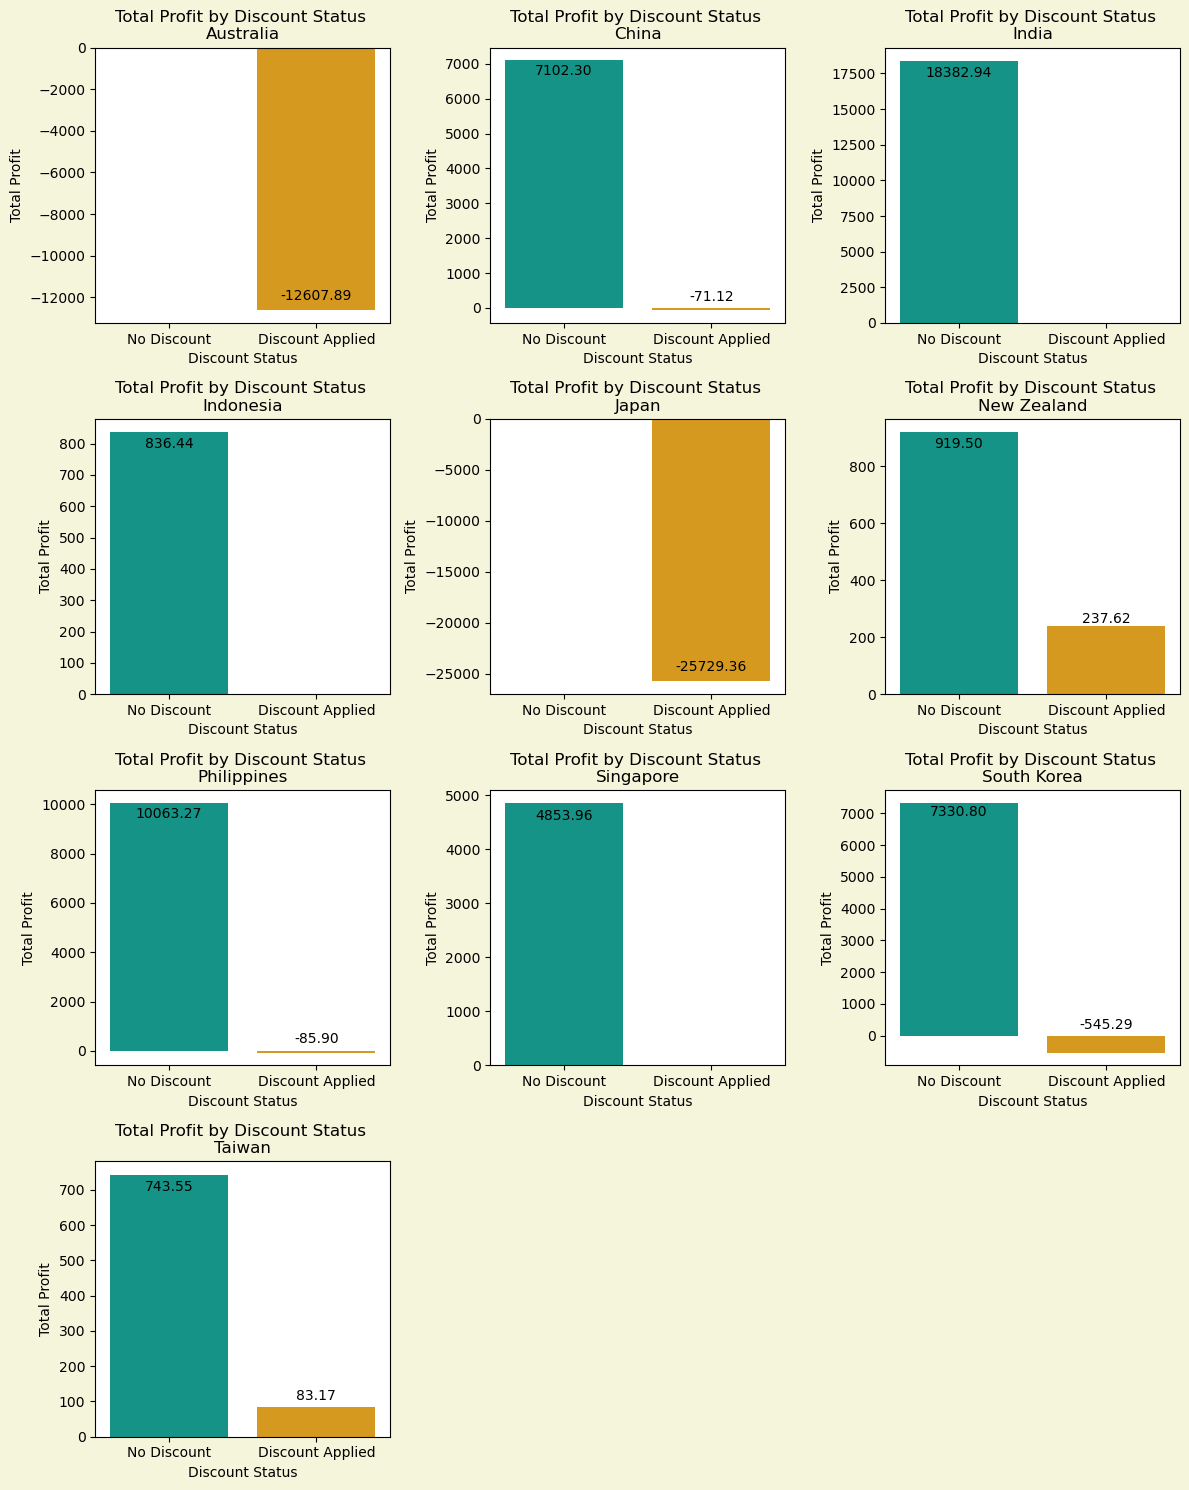

In [28]:
for i in discount_analysis_country2['Country'].unique():
    count = discount_analysis_country2[discount_analysis_country2['Country']==i]['Profit'].count()
    if count ==1:
        
        discount_applied = discount_analysis_country2.loc[discount_analysis_country2['Country'] == i, 'Discount Applied'].any()
        
        new_row = pd.DataFrame([{'Country': i,
                    'Discount Applied': not discount_applied,
                    'Sales': 0,
                    'Profit': 0}])
        discount_analysis_country2 = pd.concat((discount_analysis_country2,new_row), axis = 0)

k=0
color_palette = {
    'True': '#F4A300',  
    'False': '#00A896'  
}
plt.figure(figsize=(12, 1.5 *(discount_analysis_country2['Country'].nunique())),facecolor='beige')
for i in discount_analysis_country2['Country'].unique():
    k+=1
    plt.subplot(4,3,k)
    ax = sns.barplot(data = discount_analysis_country2[discount_analysis_country2['Country']==i],x = 'Discount Applied',y ='Profit',palette=color_palette)
    plt.xlabel('Discount Status')
    plt.xticks(discount_analysis_country2[discount_analysis_country2['Country']==i].sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
    plt.ylabel('Total Profit')
    plt.title(f'Total Profit by Discount Status \n{i}')
    # Annotate barplot
    for p in ax.patches:
        if p.get_height()>0:
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()*0.9), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        elif (p.get_height()<0) & (p.get_height()!=-545.2947):
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        elif p.get_height()==-545.2947:
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., -100), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        else:
            continue

plt.tight_layout()
plt.show()


insight:

- Australia shows a substantial loss of $12,607.89 USD when discounts are applied, and there are no transactions when no discounts are offered. This suggests that the current pricing strategy in Australia may not be effective, as the market might be highly price-sensitive.
- Philippines and Taiwan generate positive profits without discounts but face minor losses when discounts are applied.
- Australia and Japan have no transactions without discounts, indicating that customers in these countries might be waiting for discounts to make purchases or the market does not respond well to full-price offerings.
- India, Indonesia, and Singapore also have no transactions when discounts are applied, suggesting that discounts might not be offered in these markets.
- New Zealand has a small profit when discounts are applied (237.62 USD), but also earns a profit without discounts (919.50 USD), suggesting a balanced market where discounts might encourage additional sales without significantly impacting profitability.
- Singapore and Indonesia generate positive profits without discounts, indicating a potential for profitable growth in these markets even without discounting.

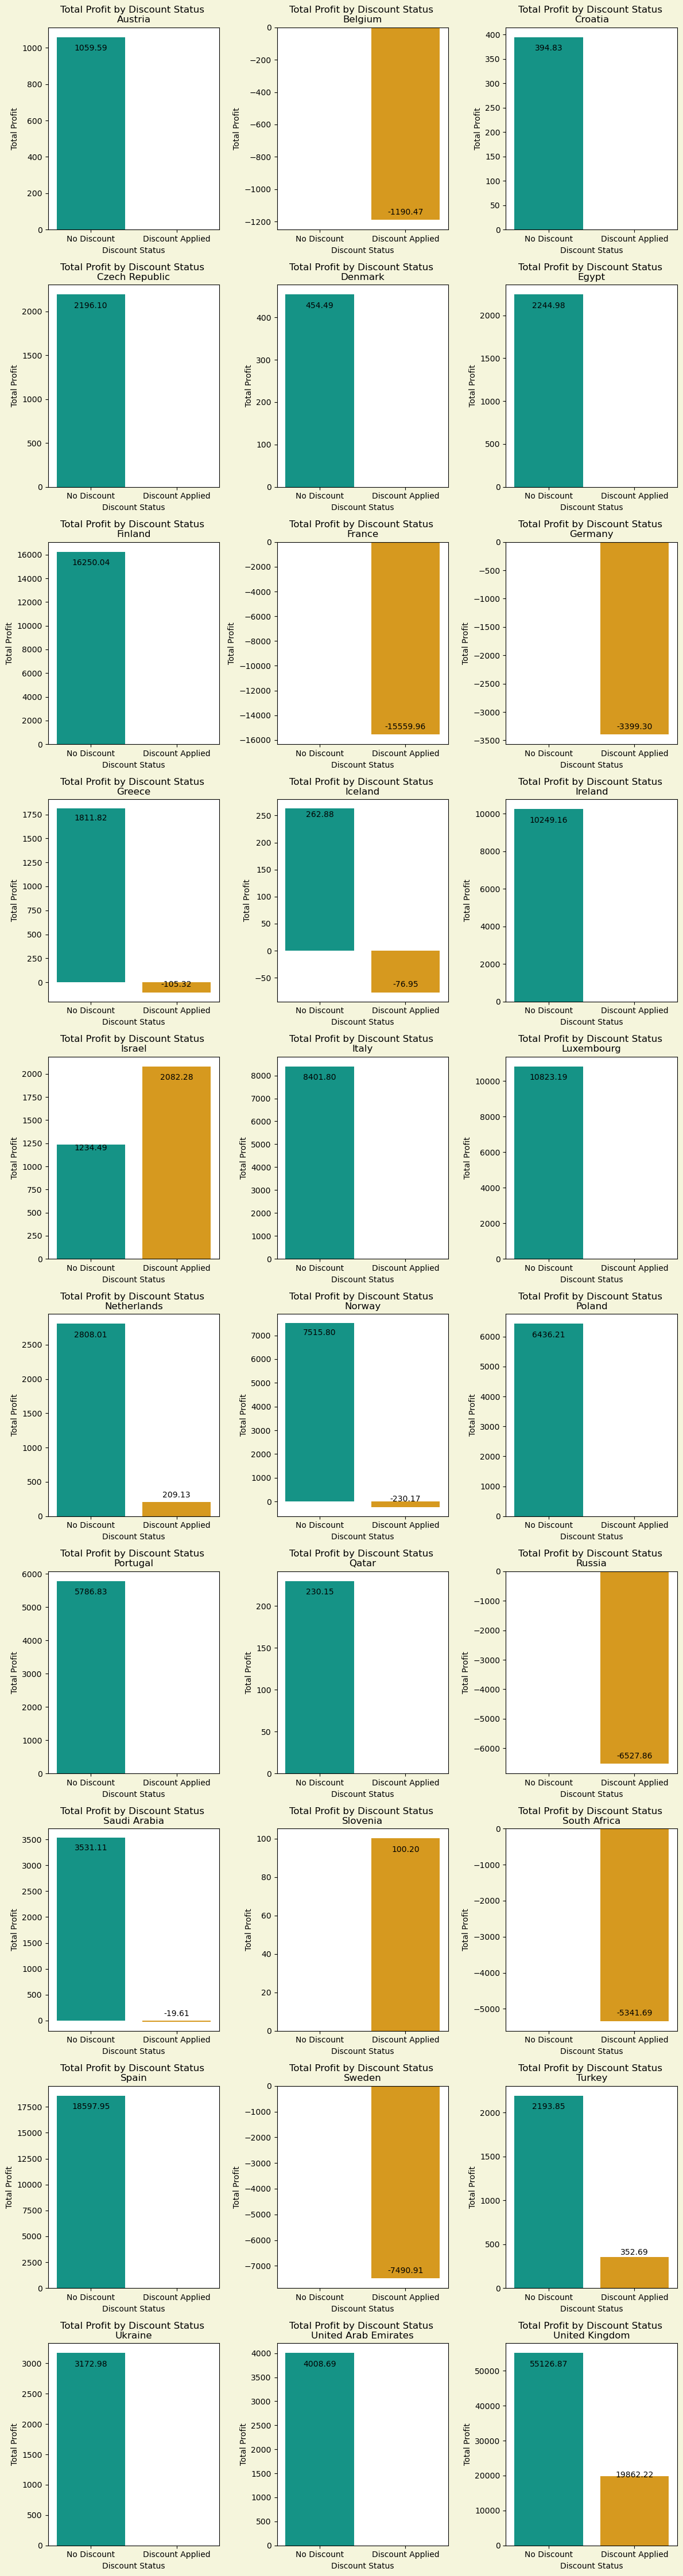

In [29]:
for i in discount_analysis_country3['Country'].unique():
    count = discount_analysis_country3[discount_analysis_country3['Country']==i]['Profit'].count()
    if count ==1:
        
        discount_applied = discount_analysis_country3.loc[discount_analysis_country3['Country'] == i, 'Discount Applied'].any()
        
        new_row = pd.DataFrame([{'Country': i,
                    'Discount Applied': not discount_applied,
                    'Sales': 0,
                    'Profit': 0}])
        discount_analysis_country3 = pd.concat((discount_analysis_country3,new_row), axis = 0)

k=0
color_palette = {
    'True': '#F4A300',  
    'False': '#00A896'  
}
plt.figure(figsize=(12, 1.5 *(discount_analysis_country3['Country'].nunique())),facecolor = 'beige')
for i in discount_analysis_country3['Country'].unique():
    k+=1
    plt.subplot(10,3,k)
    ax = sns.barplot(data = discount_analysis_country3[discount_analysis_country3['Country']==i],x = 'Discount Applied',y ='Profit',palette=color_palette)
    plt.xlabel('Discount Status')
    plt.xticks(discount_analysis_country3[discount_analysis_country3['Country']==i].sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
    plt.ylabel('Total Profit')
    plt.title(f'Total Profit by Discount Status \n{i}')
    # Annotate barplot
    for p in ax.patches:
        if p.get_height()>0:
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()*0.9), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        elif p.get_height()<0:
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        else:
            continue

plt.tight_layout()
plt.show()


insight:

- Several countries show positive profits when no discount is applied. For instance, Finland leads with a profit of 16,250.04 USD, followed by Spain (18,597.95 USD), and United Kingdom (55,126.87 USD). These figures indicate that these markets are responding well to full-price sales and that there is strong demand even without discounting.
- France and Germany show significant negative profits with discounts, at 15,559.96 USD and 3,399.30 USD respectively. This indicates that the discounts offered in these countries might be too much.
- Sweden and South Africa also have considerable negative profits with discounts, at 7,490.91 USD and 5,341.69 USD respectively, signaling potential issues with the discount strategy in these markets.
- Countries like Austria, Finland, Portugal, Croatia, and Czech Republic show no transactions when discounts are applied, despite showing positive profits without discounts. This might suggest that the discount are not offered in these markets.
- Israel shows positive profits both with and without discounts, suggesting that the market is flexible and can be profitable with different pricing strategies.
- United Kingdom shows significant profits both with (19,862.22 USD) and without discounts (55,126.87 USD), indicating a good market where discounts can still drive profitability.

## RFM Analysis

In [30]:
df_rfm = df[['Order ID','Order Date','Customer ID','Sales']]
df_rfm.sample(5)

,Order ID,Order Date,Customer ID,Sales
3184,APJ-2023-152912,2023-11-10,1046,544.380
8467,AMER-2022-168557,2022-09-20,1026,8.928
8517,APJ-2023-149720,2023-06-05,1082,30.336
5027,APJ-2023-130953,2023-07-30,1036,302.670
7412,EMEA-2023-121125,2023-05-31,1023,35.360


In [31]:
# define today's date
today_date = df_rfm['Order Date'].max()
# Aggregate by Customer ID
rfm = df_rfm.groupby('Customer ID').agg({'Order Date' : lambda x : (today_date - x.max()).days,
                                         'Order ID' : lambda x : x.nunique(),
                                         'Sales' : 'sum'
                                        }).rename(columns = {'Order Date' : 'Recency','Order ID' : 'Frequency', 'Sales' : 'Monetary'}).reset_index()
rfm.sample(5)

,Customer ID,Recency,Frequency,Monetary
82,1085,27,20,15736.129
84,1087,7,56,25352.511
13,1014,4,49,14296.148
6,1007,3,68,39234.761
12,1013,5,41,12636.094


In [32]:
r = pd.cut(rfm['Recency'].rank(method='dense'), bins=5, labels = range(5,0,-1))
f = pd.cut(rfm['Frequency'].rank(method='dense'), bins=5, labels = range(1,6))
m = pd.cut(rfm['Monetary'].rank(method='dense'), bins=5, labels = range(1,6))
rfm = rfm.assign(R = r.values, F = f.values, M = m.values)
rfm.sample(5)

,Customer ID,Recency,Frequency,Monetary,R,F,M
78,1081,5,51,18852.0750,5,3,2
81,1084,33,40,18886.1520,2,2,2
15,1016,16,42,20865.1000,4,2,3
59,1061,96,37,17494.6350,1,2,2
27,1028,12,65,22780.1968,4,4,3


In [33]:
rfm['RFM Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
rfm.sample(5)

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM Score
95,1098,1,40,22650.8206,5,2,3,523
8,1009,6,103,43893.0424,5,5,5,555
78,1081,5,51,18852.0750,5,3,2,532
31,1032,2,69,29886.8860,5,5,4,554
1,1002,21,76,27278.5930,3,5,4,354


In [34]:
# Create customer segments based on RFM score
Champion = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]

# Create a function to assign customers to various customer segments based on RFM score
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score in Champion:
            value = 'Champion'
        elif score in Loyal_Customer:
            value = 'Loyal Customer'
        elif score in Potential_Loyalist:
            value = 'Potential Loyalist'
        elif score in New_Customer:
            value = 'New Customer'
        elif score in Promising:
            value = 'Promising'
        elif score in Need_Attention:
            value = 'Need Attention'
        elif score in Cannot_Lose_Them:
            value = 'Cannot Lose Them'
        elif score in About_to_Sleep:
            value = 'About to Sleep'
        elif score in At_Risk:
            value = 'At Risk'
        elif score in Hibernating:
            value = 'Hibernating'
        elif score in Lost:
            value = 'Lost'
        else:
            value = 'null'
        segment.append(value)
    return segment

# Assign customers to segments based on their RFM score
rfm['Customer Segment'] = assign_cust_seg(rfm['RFM Score'].astype(int))
rfm.sample(5)

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM Score,Customer Segment
27,1028,12,65,22780.1968,4,4,3,443,Need Attention
62,1064,0,32,17636.5600,5,2,2,522,Promising
11,1012,4,25,7100.9290,5,1,1,511,New Customer
28,1029,7,58,55719.2100,5,4,5,545,Champion
19,1020,239,13,6132.5210,1,1,1,111,Lost


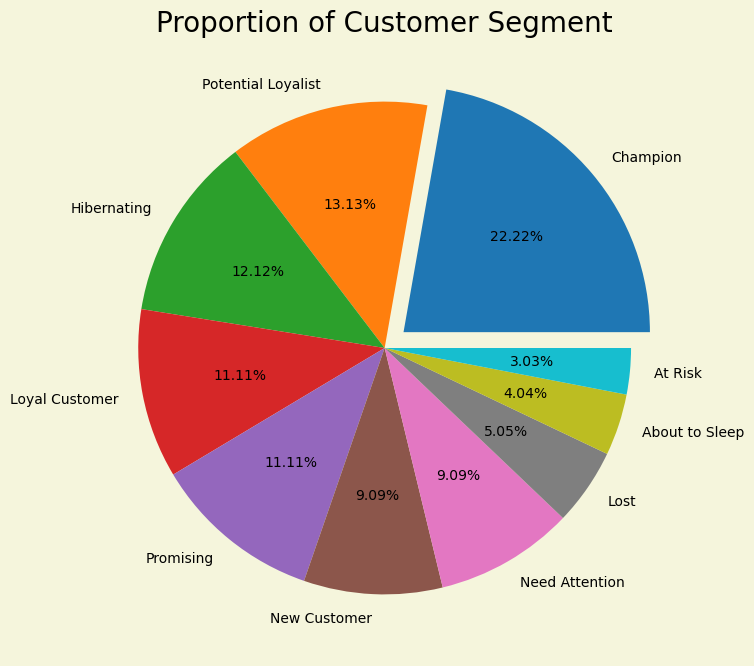

In [35]:
plt.figure(figsize = (13,8), facecolor = 'beige')
plt.pie(x = rfm['Customer Segment'].value_counts(),labels = rfm['Customer Segment'].value_counts().reset_index()['Customer Segment'],autopct = '%.2f%%',
        explode = (0.1,0,0,0,0,0,0,0,0,0))
plt.title('Proportion of Customer Segment',fontsize = 20)
plt.show()

**Insights**

1. **`Champions` (22)**
   - **Insights**: These are your best customers who frequently engage and have high monetary value. They are likely to be advocates for your product.
   - **Recommendation**: Continue to encourage these relationships. Consider offering them exclusive benefits, early access to new features, or personalized services to maintain their loyalty.

2. **`Potential Loyalists` (13)**
   - **Insights**: These customers are close to becoming loyal. They engage frequently but might not have as high a monetary value yet.
   - **Recommendation**: provide rewards to motivate them to increase their spending or engagement. Offer targeted promotions or upsell additional services that align with their needs.

3. **`Hibernating` (12)**
   - **Insights**: These customers haven't engaged recently but were once active. They may be on the verge of churn if not re-engaged.
   - **Recommendation**: Reach out with reactivation campaigns, personalized emails, or special offers to reignite their interest. Identify any potential reasons for their inactivity and address them.

4. **`Loyal Customers` (11)**
   - **Insights**: These customers are loyal but may not be as engaged as Champions. They have a steady usage pattern.
   - **Recommendation**: Strengthen this segment's loyalty by acknowledging their consistency. Provide value-added services or loyalty programs to encourage them to move into the Champion category.

5. **`Promising` (11)**
   - **Insights**: These customers show potential but haven't yet reached the levels of loyalty or spending that others have.
   - **Recommendation**: Nurture these relationships with targeted content or offers that align with their usage patterns. Educate them on the benefits of deeper engagement with your product.

6. **`New Customers` (9)**
   - **Insights**: These are recent sign-ups who haven't yet shown loyalty.
   - **Recommendation**: Focus on onboarding and providing a smooth customer experience. Ensure they understand how to get the most out of your product, and consider offering welcome discounts or resources.

7. **`Need Attention` (9)**
   - **Insights**: These customers might be showing signs of declining engagement or satisfaction.
   - **Recommendation**: Proactively reach out to understand their concerns. Offer personalized support or solutions to prevent churn. Monitor their activity closely.

8. **`Lost` (5)**
   - **Insights**: These customers have likely churned and are not engaging with your service.
   - **Recommendation**: Attempt a win-back campaign with targeted offers. However, assess whether it's worth the effort based on their past value.

9. **`About to Sleep` (4)**
   - **Insights**: These customers are on the verge of becoming inactive.
   - **Recommendation**: Implement a re-engagement strategy. Send reminders, offer incentives, or highlight new features that might interest them.

10. **`At Risk` (3)**
    - **Insights**: These customers are at a high risk of churning, showing low engagement or satisfaction.
    - **Recommendation**: Prioritize this group for immediate intervention. Identify their pain points and offer solutions quickly to prevent churn.

In [36]:
# Adding RFM Score and Customer Segment to the original dataframe

df = df.merge(rfm[['Customer ID','RFM Score','Customer Segment']], how = 'left', on = 'Customer ID')
df

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Discount Applied,RFM Score,Customer Segment
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,False,555,Champion
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,False,555,Champion
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,False,434,Need Attention
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,True,544,Champion
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,True,544,Champion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,True,544,Champion
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,False,555,Champion
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,True,555,Champion
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,False,555,Champion


## Sales and profit performance on each customer segmentation

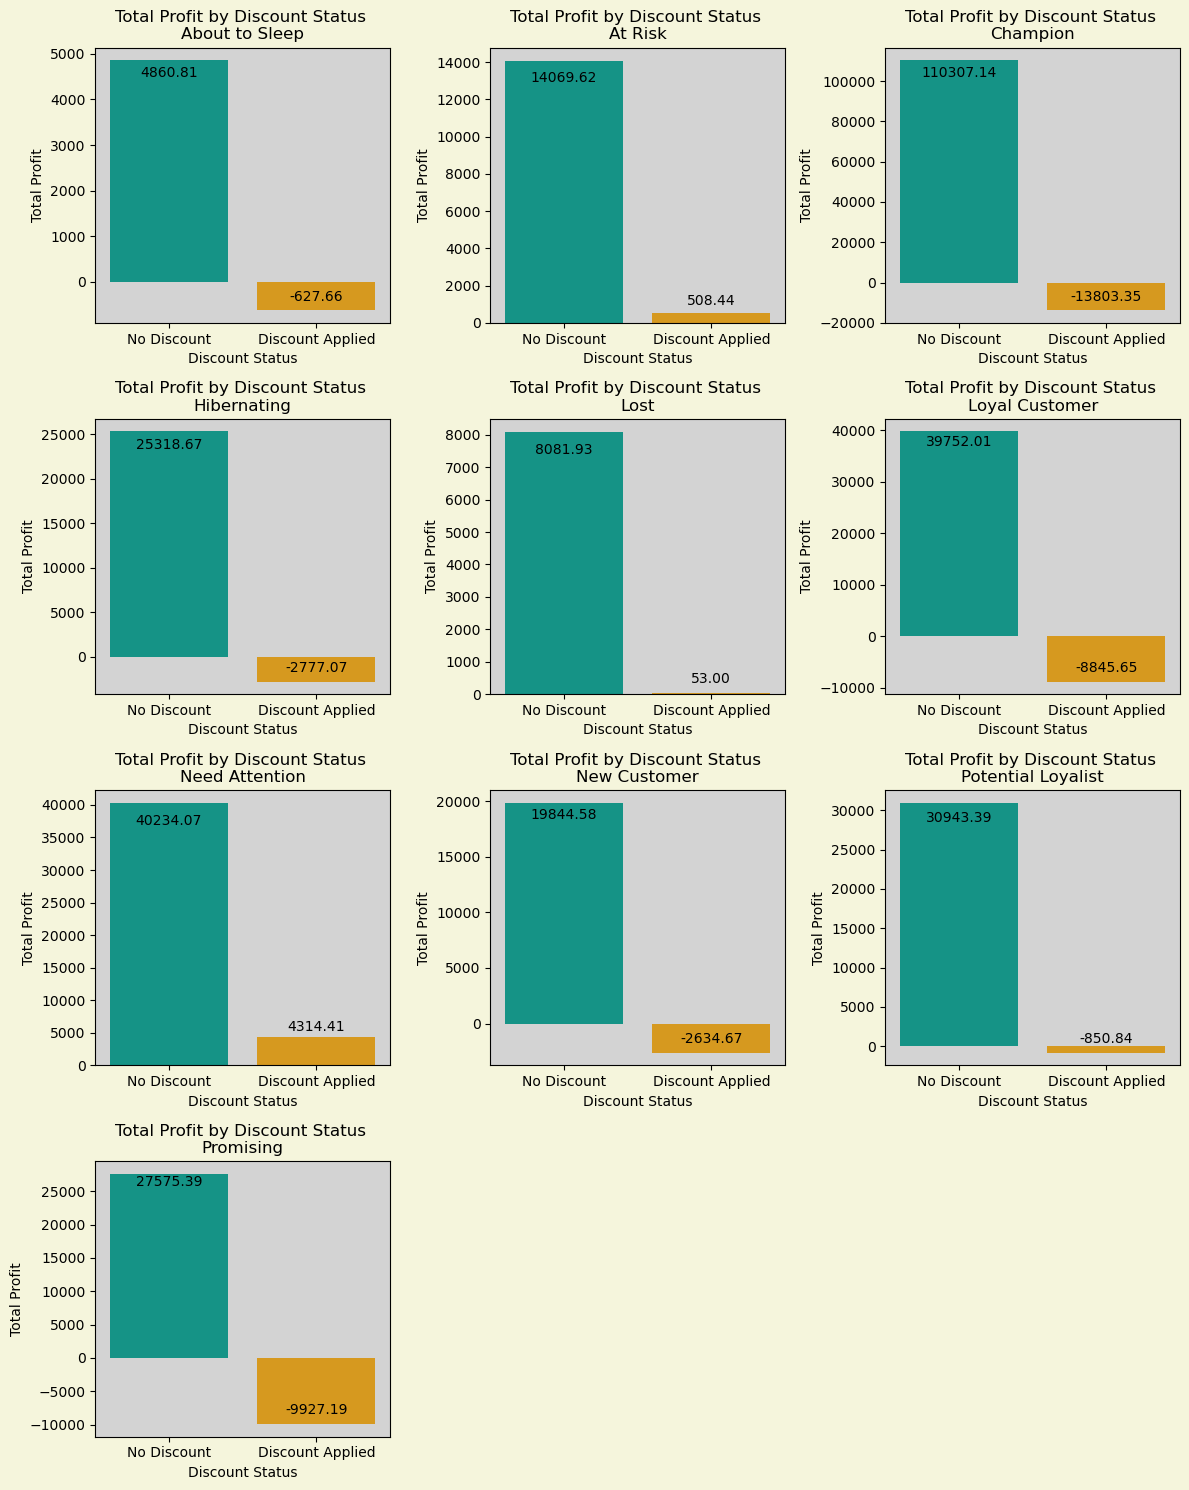

In [37]:
discount_analysis_segment = df.groupby(['Customer Segment','Discount Applied']).agg({'Sales': 'sum','Profit': 'sum'}).reset_index()

k=0
color_palette = {
    'True': '#F4A300',  
    'False': '#00A896'  
}
plt.figure(figsize=(12, 1.5 * (discount_analysis_segment['Customer Segment'].nunique())),facecolor='beige')
for i in discount_analysis_segment['Customer Segment'].unique():
    k+=1
    plt.subplot(4,3,k)
    ax = sns.barplot(data = discount_analysis_segment[discount_analysis_segment['Customer Segment']==i],x = 'Discount Applied',y ='Profit',palette=color_palette)
    plt.xlabel('Discount Status')
    plt.xticks(discount_analysis_segment[discount_analysis_segment['Customer Segment']==i].sort_values('Discount Applied')['Discount Applied'],['No Discount','Discount Applied'])
    plt.ylabel('Total Profit')
    plt.title(f'Total Profit by Discount Status \n{i}')
    ax.set_facecolor('lightgray')
    # Annotate barplot
    for p in ax.patches:
        if p.get_height()>0:
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()*0.88), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')
        else:
            ax.annotate(format(p.get_height(), '.2f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 10), 
                           textcoords = 'offset points')

plt.tight_layout()
plt.show()


insight:

- Champions: Without discounts, this segment generates a significant profit of 110,307.14 USD, but with discounts, there is a steep decline resulting in a negative profit of 13,803.35 USD. This suggests that offering discounts to Champions, who are already highly engaged, may not be necessary and could be detrimental to profitability.
- Loyal Customers: Similar to Champions, Loyal Customers also contribute positively with no discounts (39,752.01 USD), but discounts result in a negative profit of 8,845.65 USD. This indicates that discounts might not be well received by this segment or might decrease their perceived value.
- Promising and New Customers: Both segments show negative profit when discounts are applied, with Promising customers negative profit 9,927.19 USD and New Customers negative profit 2,634.67 USD. This suggests that discounts might not be the best way to convert these segments into more loyal customers.
- Hibernating Customers: While this segment shows a solid profit without discounts (25,318.68 USD), it turns negative with discounts (-2,777.07 USD), indicating that discounts do not successfully re-engage this segment.
- Need Attention: This segment shows a small but positive profit with discounts (4,314.41 USD) compared to without discounts (40,234.07 USD). This suggests that this segment may be responsive to discounts, which can help re-engage them.
- At Risk: There is a slight positive profit with discounts (508.44 USD) compared to a much higher profit without discounts (14,069.62 USD). While discounts can prevent these customers from churning, they significantly reduce profitability.
- The Lost segment shows a slight positive impact of discounts (52.99 USD) compared to a larger profit without discounts (8,081.93 USD). This suggests that discounts might help re-engage some lost customers, though the impact is minimal.
- Overall, all segments demonstrate a significant drop in profit when discounts are applied, indicating that the current discount strategies may be ineffective.

## Hypothesis Testing on Sales and Profit for each customer segments

In [38]:
# normallity test for Sales data for each customer segment

for i in df['Customer Segment'].unique():
    p_val = kstest(df[df['Customer Segment']==i]['Sales'],'norm').pvalue
    if p_val <= 0.05:
        print(f'P-Value = {p_val}')
        print(f'we do not assume Sales {i} is a normal distribution\n')   
    else:
        print(f'P-Value = {p_val}')
        print(f'we assume Sales {i} is a normal distribution\n')

P-Value = 0.0
we do not assume Sales Champion is a normal distribution

P-Value = 0.0
we do not assume Sales Need Attention is a normal distribution

P-Value = 0.0
we do not assume Sales Hibernating is a normal distribution

P-Value = 0.0
we do not assume Sales Promising is a normal distribution

P-Value = 0.0
we do not assume Sales Potential Loyalist is a normal distribution

P-Value = 0.0
we do not assume Sales At Risk is a normal distribution

P-Value = 0.0
we do not assume Sales Loyal Customer is a normal distribution

P-Value = 0.0
we do not assume Sales Lost is a normal distribution

P-Value = 0.0
we do not assume Sales New Customer is a normal distribution

P-Value = 0.0
we do not assume Sales About to Sleep is a normal distribution



In [39]:
# normallity test for Profit data for each customer segment

for i in df['Customer Segment'].unique():
    p_val = kstest(df[df['Customer Segment']==i]['Profit'],'norm').pvalue
    if p_val <= 0.05:
        print(f'P-Value = {p_val}')
        print(f'we do not assume Profit {i} is a normal distribution\n')
    else:
        print(f'P-Value = {p_val}')
        print(f'we assume Profit {i} is a normal distribution\n')

P-Value = 0.0
we do not assume Profit Champion is a normal distribution

P-Value = 0.0
we do not assume Profit Need Attention is a normal distribution

P-Value = 0.0
we do not assume Profit Hibernating is a normal distribution

P-Value = 0.0
we do not assume Profit Promising is a normal distribution

P-Value = 0.0
we do not assume Profit Potential Loyalist is a normal distribution

P-Value = 5.165819875717267e-183
we do not assume Profit At Risk is a normal distribution

P-Value = 0.0
we do not assume Profit Loyal Customer is a normal distribution

P-Value = 3.314589732794558e-127
we do not assume Profit Lost is a normal distribution

P-Value = 1.04e-321
we do not assume Profit New Customer is a normal distribution

P-Value = 8.570640356024393e-126
we do not assume Profit About to Sleep is a normal distribution



`Assumption` : Testing whether the median sales and profit for each customer segment are the same?


`Hypothesis`

$H_{0} : $ There is no difference in the median values among the segmented customer.

$H_{a} : $ At least one of the customer segmentx has a different median.

`Significance Level` / Risk Level ($\alpha$)

$\alpha = 0.05$

Conclusion :

- p-value $\leq \alpha$ : Reject $H_{0}$
- p-value $> \alpha$ : Fail to Reject $H_{0}$ / Accept $H_{0}$

In [40]:
for i in ['Sales','Profit']:
    p_val = kruskal(df[df['Customer Segment']=='Champion'][i],
                    df[df['Customer Segment']=='Need Attention'][i],
                    df[df['Customer Segment']=='Hibernating'][i],
                    df[df['Customer Segment']=='Promising'][i],
                    df[df['Customer Segment']=='Potential Loyalist'][i],
                    df[df['Customer Segment']=='At Risk'][i],
                    df[df['Customer Segment']=='Loyal Customer'][i],
                    df[df['Customer Segment']=='Lost'][i],
                    df[df['Customer Segment']=='New Customer'][i],
                    df[df['Customer Segment']=='About to Sleep'][i]).pvalue
    if p_val <= 0.05:
        print(f'P-Value = {p_val}')
        print(f'Reject H0, At least one of the populations has a different median {i}.\n')
    else:
        print(f'P-Value = {p_val}')
        print(f'Fail to reject H0, There is no difference in the median {i} across different customer segments.\n')

P-Value = 0.2083945692375435
Fail to reject H0, There is no difference in the median Sales across different customer segments.

P-Value = 0.06740500717775438
Fail to reject H0, There is no difference in the median Profit across different customer segments.



insight:

Sales data and Profit data for each customer segmentation are not normally distributed. Therefore, we use the Kruskal-Wallis test to compare the median sales and profit across different customer segments to determine if there are statistically significant differences among them.

1. Median Sales Analysis:

- P-Value = 0.208: This p-value is greater than the significance level of 0.05. Therefore, we do not have enough evidence to reject the null hypothesis (H0). This means that there is no significant difference in the median sales across different customer segments. In other words, the sales performance is similar across all customer segments.

2. Median Profit Analysis:

- P-Value = 0.067: This p-value is slightly above the significance level 0.05 but still relatively close. With this p-value, we also do not have enough evidence to reject the null hypothesis (H0). Thus, we cannot conclude that there are significant differences in median profit across customer segments. The profit levels are generally consistent across the segments.

# Conclusion

The analysis reveals several critical insights into the impact of discount strategies on profitability and customer segmentation:

1. **Discounts and Profitability**:

- Across various regions and customer segments, **discounts generally result in a significant decrease in profit**. This indicates that **the current discount strategies may not be effective**, as they often lead to negative profitability despite increasing sales.
- In regions like APJ and EMEA, discounts lead to a shift from positive to negative profit, suggesting that **the discount strategies are particularly detrimental in these areas**.
- Conversely, in the NAMER region, while discounts do decrease profit, it remains positive, indicating that **this market may be better suited to the current discounting approach**.

2. **Regional Insights**:

- Certain countries like Argentina, Chile, and Mexico show negative profits when discounts are applied, suggesting that **discounts are decreasing profit margins rather than driving profitable sales**.
- In contrast, Brazil, Canada, and the United States **perform well both with and without discounts**, indicating a **balanced market where discounts effectively drive additional sales without severely impacting profitability**.
- Specific countries, such as Australia and Japan, show no transactions without discounts, indicating that **customers in these markets might be highly price-sensitive or that the full-price offerings are not compelling enough**.

3. **Customer Segmentation**:

- The analysis of customer segments reveals that **offering discounts to high-value customers** like `Champions` and `Loyal Customers` **may not be necessary and could even be detrimental to profitability**.
- Segments like `Promising` and `New Customers` show **negative profits when discounts are applied**, indicating that **discounting might not be the most effective strategy for converting these segments into loyal customers**.
- On the other hand, segments like **`Need Attention` and `At Risk` show some responsiveness to discounts**, suggesting that **discounts could be used strategically to re-engage these customers** and prevent churn, although this comes at a cost to profitability.

4. **Statistical Analysis**:

- The Kruskal-Wallis test indicates that **there is no significant difference in the median sales and profit across different customer segments**. This suggests that **the sales and profit performance is generally consistent across all segments**, regardless of the discount strategy.

# Recommendation

- **Reevaluate Discount Strategies**: Given the negative impact of discounts on profitability, it may be necessary to reassess and refine discount strategies, particularly in regions and customer segments where they are currently leading to losses.
- **Targeted Discounting**: Consider using more targeted discounting approaches, focusing on segments that respond positively to discounts, such as those `At Risk` of churning or those in markets like NAMER where discounts still yield positive profits.
- **Alternative Engagement Strategies**: For high-value customers who are already loyal, explore alternative engagement strategies that do not rely on discounts, such as loyalty programs, exclusive offers, or personalized experiences, to maintain profitability while enhancing customer satisfaction.
- **Personalization**: Use the insights from the RFM analysis to tailor communication, promotions, and services to each segment.
- **Customer Feedback**: Regularly gather feedback, especially from segments like `At Risk`, `Hibernating`, and `Need Attention`, to understand their needs and challenges.
- **Loyalty Programs**: Consider implementing or enhancing loyalty programs for `Champions`, `Loyal Customers`, and `Potential Loyalists`.

In [41]:
# Exporting cleaned data to csv
df.to_csv('AWS_SaaS_Sales_Cleaned_Data.csv')